# Campito Mountain Bristlecone Example

This notebook uses raw ring widths for bristlecone pine (_Pinus longaeva_) at Campito Mountain in California, USA. This is one of the datasets included in `dplR` as well and include in the dplPy distribution.

> Graybill, D. A. and LaMarche, Jr., V. C. (1983) Campito Mountain Data Set. IGBP PAGES/World Data Center for Paleoclimatology Data Contribution Series 1983-CA533.RWL. NOAA/NCDC Paleoclimatology Program, Boulder, Colorado, USA: https://www.ncei.noaa.gov/pub/data/paleo/treering/measurements/northamerica/usa/ca533.rwl

Let's start by importing some standard Python libraries.  We'll bring in Pandas (for working with 2 dimensional data), Matplotlib to help with plotting,  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 

# the following two lines nicely render figures in the notebook 
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

# you can omit the line below if you'd like, but I really don't like the default fonts in Python, so I switch to Helvetica
plt.rcParams['font.family'] = 'Helvetica'
plt.rcParams['figure.figsize'] = (10, 5)


We can update (or install) `dplpy` directly from this notebook if necessary using the 'bang' (`!`) command - you can just skip this code block or comment it out if you're already running the latest version from the Pypi repository.


In [2]:
# if necessary, install dplpy
# !pip install dplpy

# if necessary upgrade dplpy to the latest version, v0.1.2 as of January 8th, 2024
# !pip install dplpy --upgrade


Let us now import `dplpy` and we'll check the version number and see where the library is on our system.  If everything is working well, the codeblock should complete without error and you should see that you are running v0.1.2 from one of your Python directories (you will see `/envs/` in the path if you are in a virtual environment)

In [3]:
import dplpy as dpl

# print out the version number of dplPy you are using - should be v0.1.2 
print('Currently using the following version of dplPy:', dpl.__version__)

# You should see the path to your local Python installation
print('Currently using the following directory for dplPy:', dpl.__file__)

Currently using the following version of dplPy: 0.1.2
Currently using the following directory for dplPy: /Users/kja/anaconda3/envs/dplpy/lib/python3.12/site-packages/dplpy/__init__.py


Let's read the Campito Mountain raw measurement series into our notebook now.  We will use the `dpl.readers` method to do this.  For the moment, `.readers` automatically identified the file type from the file suffix, looking for `.rwl` for Tucson formatted decadal files, or `.csv`.  In the future, the method will recognize a wider variety of suffixes (e.g. `.raw`), allow you to pass the file type directly to the method, or pull from the ITRDB.  

In [4]:
# Read in the Campito Mountain series and assign to a variable
ca533 = dpl.readers("../tests/data/rwl/ca533.rwl")


Attempting to read input file: ca533.rwl as .rwl format


SUCCESS!
File read as: .rwl file

Series names:
['CAM011', 'CAM021', 'CAM031', 'CAM032', 'CAM041', 'CAM042', 'CAM051', 'CAM061', 'CAM062', 'CAM071', 'CAM072', 'CAM081', 'CAM082', 'CAM091', 'CAM092', 'CAM101', 'CAM102', 'CAM111', 'CAM112', 'CAM121', 'CAM122', 'CAM131', 'CAM132', 'CAM141', 'CAM151', 'CAM152', 'CAM161', 'CAM162', 'CAM171', 'CAM172', 'CAM181', 'CAM191', 'CAM201', 'CAM211'] 



In [5]:
# take a look at the DataFrame
ca533 #1358 years by 34 columns

CAM011  CAM021  CAM031  CAM032  CAM041  CAM042  CAM051  CAM061  CAM062  \
Year                                                                           
626      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
627      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
628      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
629      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
630      NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
1979    0.40    0.42    0.33    0.61    0.75    0.50    0.25    0.42    0.58   
1980    0.45    0.59    0.77    0.67    1.09    0.65    0.36    0.69    0.71   
1981    0.48    0.57    0.69    0.55    0.76    0.56    0.32    0.64    0.51   
1982    0.47    0.50    0.76    0.71    1.02    0.59    0.25    0.67    0.57   
1983    0.68    0.57    0.53    0.58    1.16    0.59    0.22    0.70    0.37   

      CAM071  ...  CAM151  CAM152  CAM161  CAM162  CAM171  CAM172  CAM181  \
Year          ...                                                           
626      NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
627      NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
628      NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
629      NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
630      NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...      ...  ...     ...     ...     ...     ...     ...     ...     ...   
1979    0.11  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1980    0.14  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1981    0.27  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1982    0.30  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
1983    0.32  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

      CAM191  CAM201  CAM211  
Year                          
626      NaN     NaN    0.17  
627      NaN     NaN    0.13  
628      NaN     NaN    0.14  
629      NaN     NaN    0.19  
630      NaN     NaN    0.22  
...      ...     ...     ...  
1979     NaN     NaN     NaN  
1980     NaN     NaN     NaN  
1981     NaN     NaN     NaN  
1982     NaN     NaN     NaN  
1983     NaN     NaN     NaN  

[1358 rows x 34 columns]

We could also read in the Sheep Mountain update (`ca667.rwl`).  This file has headers, though - we tell `.readers` about the existence of the Tucson style (3 line) headers when we call `.readers`:

In [6]:
# Can specify whether file has headers so reading of data is done appropriately
ca667 = dpl.readers("../tests/data/rwl/ca667.rwl", header=True)
ca667 # 310 columns, 4655 years


Attempting to read input file: ca667.rwl as .rwl format


SUCCESS!
File read as: .rwl file

Series names:
['SS004B', 'SL009A', 'ST860B', 'SS024B', 'SL004B', 'SG067A', 'SN151A', 'SL166B', 'SS004A', 'SL166C', 'SS024A', 'SN157B', 'SL009E', 'ST846A', 'SS495A', 'SL495B', 'SL004C', 'SL005C', 'SL005A', 'SL017A', 'SL017B', 'ST833A', 'SS25B', 'SL018A', 'SL018B', 'SN150A', 'SS517', 'SL517A', 'SS495C', 'SL495C', 'ST145', 'ST847A', 'SL496A', 'SL496B', 'SL511A', 'SL511D', 'ST832A', 'SS025C', 'SS025A', 'ST842A', 'SL127A', 'SL486A', 'SN154B', 'SS026A', 'ST834A', 'SN151B', 'ST851A', 'SS030A', 'SL166A', 'SG063A', 'SS33X', 'SN154A', 'ST837B', 'ST849B', 'ST849A', 'SN152X', 'SL151A', 'SS151A', 'SG064A', 'SN150B', 'SS027A', 'SN155X', 'ST836C', 'SL271B', 'SS029A', 'ST836A', 'SS144A', 'SB030A', 'SL151B', 'SL271C', 'SS022X', 'SG066B', 'SG066A', 'SG063D', 'SL494A', 'SS32X', 'SL022A', 'SL022B', 'SS160A', 'SG063B', 'ST840A', 'SS282A', 'SS022A', 'ST835A', 'SG066D', 'SS292A', 'SG069A', 'SS324', 'SG097B', 'SB005A'

SS004B  SL009A  ST860B  SS024B  SL004B  SG067A  SN151A  SL166B  SS004A  \
Year                                                                            
-2649    0.68    0.28    0.43    0.47    0.64    0.40    0.69    0.56    0.62   
-2648    0.63    0.38    0.45    0.43    0.51    0.22    0.73    0.46    0.50   
-2647    0.47    0.30    0.36    0.16    0.33    0.16    0.43    0.36    0.36   
-2646    0.62    0.33    0.45    0.31    0.68    0.29    0.61    0.46    0.67   
-2645    0.51    0.44    0.42    0.21    0.55    0.21    0.45    0.53    0.67   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 2001     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
 2002     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
 2003     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
 2004     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
 2005     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

       SL166C  ...  SH970A  SH913B  SH965b  ST891A  ST891B  SL605B  SH965a  \
Year           ...                                                           
-2649    0.40  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
-2648    0.34  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
-2647    0.25  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
-2646    0.33  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
-2645    0.36  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...       ...  ...     ...     ...     ...     ...     ...     ...     ...   
 2001     NaN  ...   1.512   0.952   0.432    0.55    0.66     NaN     NaN   
 2002     NaN  ...   1.226   0.628   0.070    0.67    0.55     NaN     NaN   
 2003     NaN  ...   1.758   0.728   0.126    0.75    0.73     NaN     NaN   
 2004     NaN  ...   2.122   0.828   0.214     NaN     NaN     NaN     NaN   
 2005     NaN  ...   1.786   1.192   0.432     NaN     NaN     NaN     NaN   

       SH958A  ST814A  Sn974b  
Year                           
-2649     NaN     NaN     NaN  
-2648     NaN     NaN     NaN  
-2647     NaN     NaN     NaN  
-2646     NaN     NaN     NaN  
-2645     NaN     NaN     NaN  
...       ...     ...     ...  
 2001   0.538    0.70   1.960  
 2002   0.256    0.60   1.088  
 2003   0.402    0.73   1.194  
 2004   0.454     NaN   1.730  
 2005   0.540     NaN   1.344  

[4655 rows x 310 columns]

In [7]:
print(ca533.index) # Campito Mountain chronology covers 626 to 1983
print(ca667.index)  # Campito Mountain chronology covers -2649 (BCE) to 2005!

Index([ 626,  627,  628,  629,  630,  631,  632,  633,  634,  635,
       ...
       1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983],
      dtype='int64', name='Year', length=1358)
Index([-2649, -2648, -2647, -2646, -2645, -2644, -2643, -2642, -2641, -2640,
       ...
        1996,  1997,  1998,  1999,  2000,  2001,  2002,  2003,  2004,  2005],
      dtype='int64', name='Year', length=4655)


We could, if we wanted, use Pandas to merge the two datasets to form a combined Sheep-Campito Mountain chronology.  The codeblock below shows how to use Pandas [.merge](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html) to do this.  Because this creates a very large and very long set of series, we won't use this in the rest of the notebook, but it is useful to see how you might do this.  Of note is that the `.merge` function is NOT unique to `dplpy` - following the overall philosophy also adopted for dplR, we don't create functions with openDendro to do common data manipulations or data handling (e.g. things that are not specific to dendrochronology): 

In [8]:
shpcmp = pd.merge(ca533, ca667, left_index=True, right_index=True, how='outer')
shpcmp # pretty-print from Pandas will show 4655 years x 344 columns

CAM011  CAM021  CAM031  CAM032  CAM041  CAM042  CAM051  CAM061  CAM062  \
Year                                                                            
-2649     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
-2648     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
-2647     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
-2646     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
-2645     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
 2001     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
 2002     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
 2003     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
 2004     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
 2005     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN     NaN   

       CAM071  ...  SH970A  SH913B  SH965b  ST891A  ST891B  SL605B  SH965a  \
Year           ...                                                           
-2649     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
-2648     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
-2647     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
-2646     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
-2645     NaN  ...     NaN     NaN     NaN     NaN     NaN     NaN     NaN   
...       ...  ...     ...     ...     ...     ...     ...     ...     ...   
 2001     NaN  ...   1.512   0.952   0.432    0.55    0.66     NaN     NaN   
 2002     NaN  ...   1.226   0.628   0.070    0.67    0.55     NaN     NaN   
 2003     NaN  ...   1.758   0.728   0.126    0.75    0.73     NaN     NaN   
 2004     NaN  ...   2.122   0.828   0.214     NaN     NaN     NaN     NaN   
 2005     NaN  ...   1.786   1.192   0.432     NaN     NaN     NaN     NaN   

       SH958A  ST814A  Sn974b  
Year                           
-2649     NaN     NaN     NaN  
-2648     NaN     NaN     NaN  
-2647     NaN     NaN     NaN  
-2646     NaN     NaN     NaN  
-2645     NaN     NaN     NaN  
...       ...     ...     ...  
 2001   0.538    0.70   1.960  
 2002   0.256    0.60   1.088  
 2003   0.402    0.73   1.194  
 2004   0.454     NaN   1.730  
 2005   0.540     NaN   1.344  

[4655 rows x 344 columns]

Back to Campito Mountain (`ca533`)now.  Our `dplpy` provides both `.summary` statistics (the individual series mean, quantiles, max and min values) as well as the `.statistics` of the individual series including first and last year, mean, median, standard deviation, skew, gini coefficient and AR1 coefficient similar to ARSTAN.  The module names follow those in `dplR` and report complementary data:

In [9]:
dpl.summary(ca533)

CAM011      CAM021      CAM031      CAM032      CAM041      CAM042  \
count  454.000000  551.000000  628.000000  549.000000  301.000000  446.000000   
mean     0.439581    0.424465    0.349156    0.293224    0.525648    0.439148   
std      0.221801    0.185397    0.213666    0.162930    0.222568    0.347705   
min      0.000000    0.050000    0.000000    0.000000    0.100000    0.070000   
25%      0.290000    0.290000    0.180000    0.180000    0.350000    0.270000   
50%      0.400000    0.400000    0.290000    0.260000    0.530000    0.360000   
75%      0.540000    0.520000    0.510000    0.390000    0.680000    0.460000   
max      1.360000    1.110000    1.030000    0.850000    1.380000    3.030000   

           CAM051      CAM061      CAM062      CAM071  ...      CAM151  \
count  737.000000  627.000000  459.000000  947.000000  ...  749.000000   
mean     0.273012    0.462281    0.441939    0.249071  ...    0.445648   
std      0.139691    0.201785    0.188389    0.109357  ...    0.272561   
min      0.000000    0.000000    0.000000    0.000000  ...    0.000000   
25%      0.180000    0.335000    0.330000    0.180000  ...    0.240000   
50%      0.250000    0.470000    0.450000    0.250000  ...    0.390000   
75%      0.330000    0.600000    0.580000    0.320000  ...    0.610000   
max      1.320000    1.090000    0.920000    0.620000  ...    1.640000   

           CAM152      CAM161       CAM162      CAM171      CAM172  \
count  229.000000  504.000000  1000.000000  758.000000  797.000000   
mean     0.533799    0.339464     0.396710    0.450264    0.482296   
std      0.194947    0.148916     0.184057    0.209848    0.249002   
min      0.060000    0.000000     0.000000    0.080000    0.080000   
25%      0.410000    0.230000     0.260000    0.300000    0.310000   
50%      0.520000    0.330000     0.370000    0.400000    0.420000   
75%      0.660000    0.430000     0.510000    0.580000    0.590000   
max      1.250000    0.900000     1.040000    1.540000    1.980000   

           CAM181      CAM191      CAM201       CAM211  
count  781.000000  791.000000  593.000000  1343.000000  
mean     0.282638    0.366271    0.473929     0.356813  
std      0.148853    0.335788    0.180967     0.182086  
min      0.000000    0.000000    0.000000     0.000000  
25%      0.170000    0.170000    0.350000     0.220000  
50%      0.250000    0.250000    0.470000     0.340000  
75%      0.380000    0.455000    0.580000     0.470000  
max      0.800000    2.540000    1.490000     1.100000  

[8 rows x 34 columns]

In [10]:
dpl.stats(ca533)

series  first  last  year   mean  median  stdev   skew   gini    ar1
1   CAM011   1530  1983   454  0.440    0.40  0.222  1.029  0.273  0.698
2   CAM021   1433  1983   551  0.424    0.40  0.185  0.946  0.237  0.702
3   CAM031   1356  1983   628  0.349    0.29  0.214  0.690  0.341  0.809
4   CAM032   1435  1983   549  0.293    0.26  0.163  0.717  0.309  0.665
5   CAM041   1683  1983   301  0.526    0.53  0.223  0.488  0.238  0.710
6   CAM042   1538  1983   446  0.439    0.36  0.348  3.678  0.324  0.881
7   CAM051   1247  1983   737  0.273    0.25  0.140  1.836  0.262  0.705
8   CAM061   1357  1983   627  0.462    0.47  0.202 -0.111  0.247  0.510
9   CAM062   1525  1983   459  0.442    0.45  0.188 -0.266  0.240  0.529
10  CAM071   1037  1983   947  0.249    0.25  0.109  0.027  0.247  0.578
11  CAM072   1114  1983   870  0.309    0.29  0.163  0.698  0.292  0.735
12  CAM081   1081  1983   903  0.327    0.31  0.124  0.555  0.211  0.723
13  CAM082    977  1983  1007  0.285    0.29  0.114  0.312  0.223  0.771
14  CAM091   1460  1983   524  0.532    0.52  0.255  0.425  0.267  0.632
15  CAM092   1591  1983   393  0.349    0.34  0.226  0.337  0.369  0.561
16  CAM101   1727  1983   257  0.568    0.56  0.260  0.254  0.259  0.716
17  CAM102   1665  1983   319  0.604    0.62  0.261  0.082  0.243  0.677
18  CAM111   1446  1983   538  0.625    0.62  0.249  0.196  0.225  0.625
19  CAM112   1471  1983   513  0.570    0.56  0.211  0.223  0.207  0.583
20  CAM121   1000  1983   984  0.259    0.26  0.106  0.042  0.231  0.594
21  CAM122   1000  1983   984  0.271    0.27  0.109  0.346  0.223  0.653
22  CAM131    695  1970  1276  0.552    0.53  0.198  0.330  0.202  0.788
23  CAM132    710  1232   523  0.397    0.38  0.148  0.871  0.203  0.810
24  CAM141   1030  1970   941  0.627    0.60  0.204  0.695  0.177  0.746
25  CAM151   1222  1970   749  0.446    0.39  0.273  1.068  0.332  0.765
26  CAM152   1221  1449   229  0.534    0.52  0.195  0.297  0.203  0.695
27  CAM161   1106  1609   504  0.339    0.33  0.149  0.633  0.243  0.794
28  CAM162    971  1970  1000  0.397    0.37  0.184  0.647  0.259  0.840
29  CAM171   1213  1970   758  0.450    0.40  0.210  1.250  0.250  0.799
30  CAM172   1174  1970   797  0.482    0.42  0.249  1.622  0.268  0.847
31  CAM181   1190  1970   781  0.283    0.25  0.149  0.706  0.293  0.805
32  CAM191   1180  1970   791  0.366    0.25  0.336  2.359  0.429  0.876
33  CAM201    990  1582   593  0.474    0.47  0.181  0.772  0.208  0.709
34  CAM211    626  1968  1343  0.357    0.34  0.182  0.513  0.286  0.683

Another module available is the `.report`, which has information similar to that provided by COFECHA and mirrors the similar function in dplR, including the years with locally absent rings in each individual series:

In [11]:
# We can get a report of some of the essential features of this dataset from .report
dpl.report(ca533)

Number of dated series: 34
Number of measurements: 23276
Avg series length: 684.5882
Range: 1358
Span: 626 - 1983
Mean (Std dev) series intercorrelation:
Mean (Std dev) AR1: 0.7122
-------------
Years with absent rings listed by series

      CAM011 -- 1753 1782
      CAM031 -- 1497 1500 1523 1533 1540 1542 1545 1578 1579 1580 1655 1668 1670 1681
      CAM032 -- 1497 1523 1579 1654 1670 1681 1782
      CAM051 -- 1475
      CAM061 -- 1497 1523 1542 1545 1547 1579 1654 1655 1668 1670 1672 1782 1858 1960
      CAM062 -- 1542 1545 1547 1548 1579 1654 1655 1670 1672 1782 1836 1857 1858 1929
      CAM071 -- 1269 1497 1498 1523 1542 1547 1578 1579 1612 1655 1656 1668 1670 1672 1674 1690 1707 1708 1756 1782 1795 1820 1836 1845 1857 1858 1924 1948 1960
      CAM072 -- 1218 1497 1498 1523 1533 1538 1542 1545 1546 1547 1571 1579 1580 1590 1654 1655 1668 1670 1672 1675 1690
      CAM081 -- 1218 1336
      CAM082 -- 1362 1858 1865
      CAM091 -- 1655 1669 1670 1782 1858
      CAM092 -- 1624 1654 1

As in dplR, we can readily `.plot` spaghetti (`type="spag"`) or segment (`type="seg"`) plots.  Note that `.plot` here is a method attached to the core `dplpy` library.  

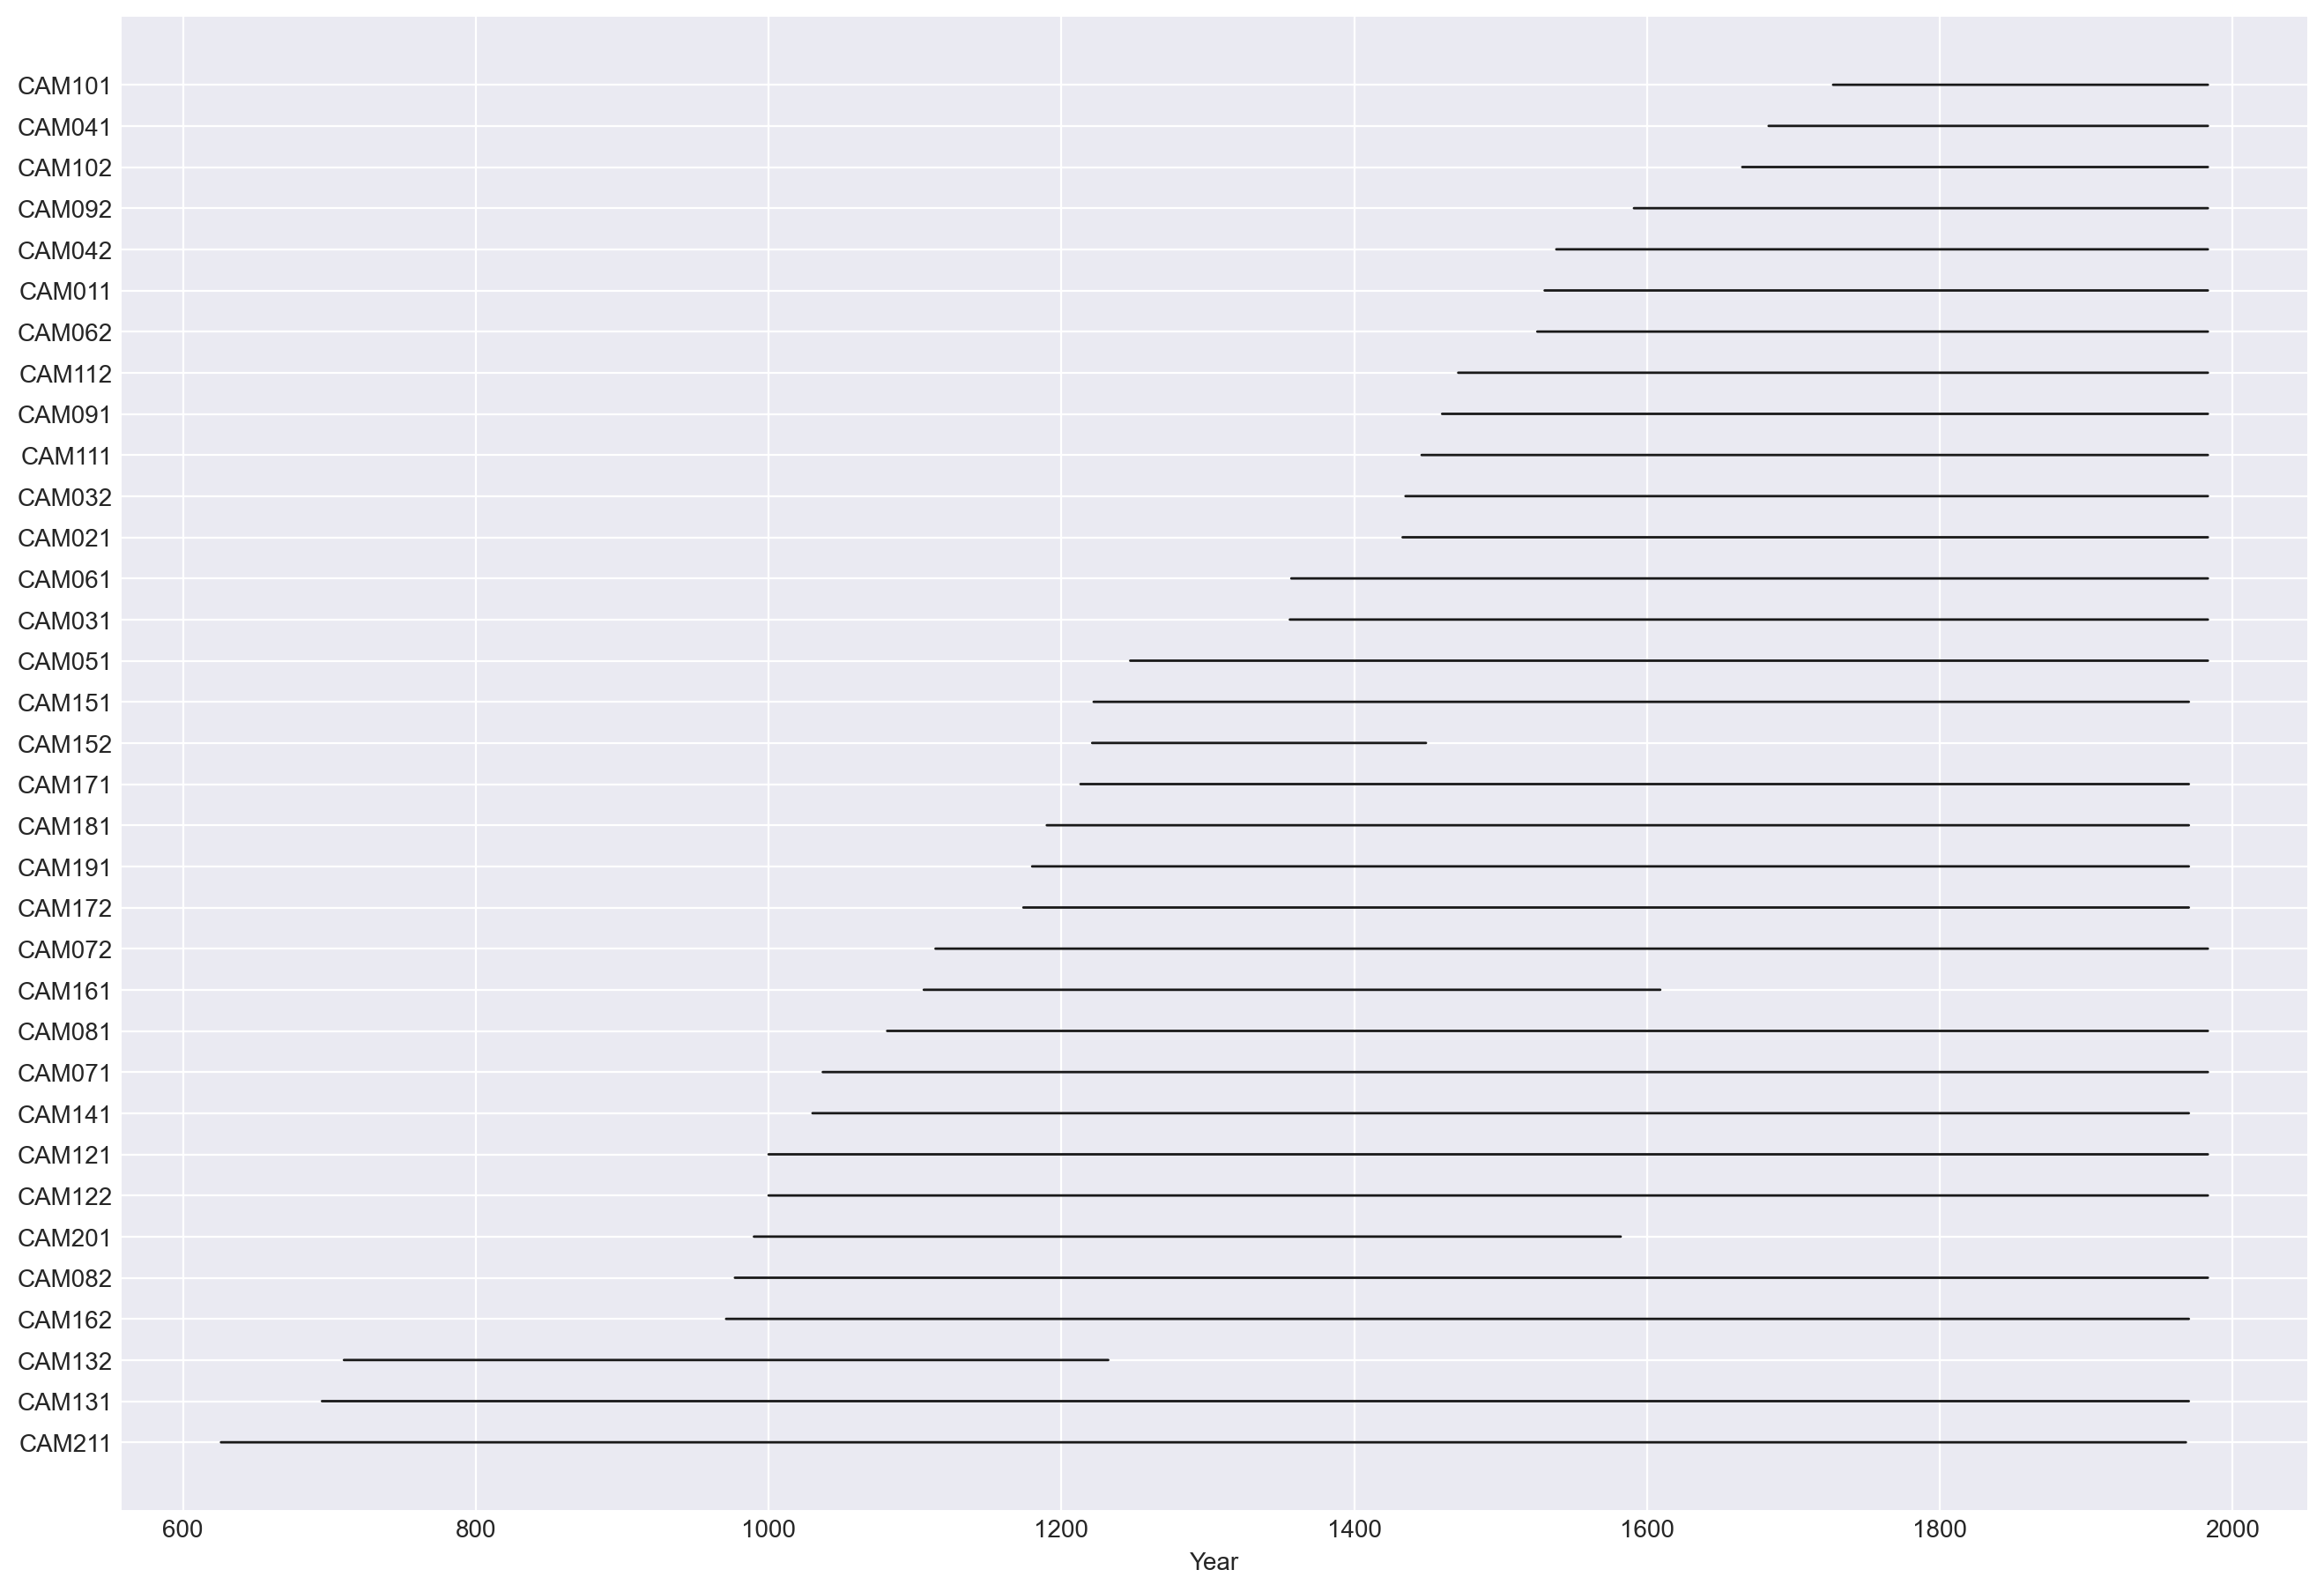

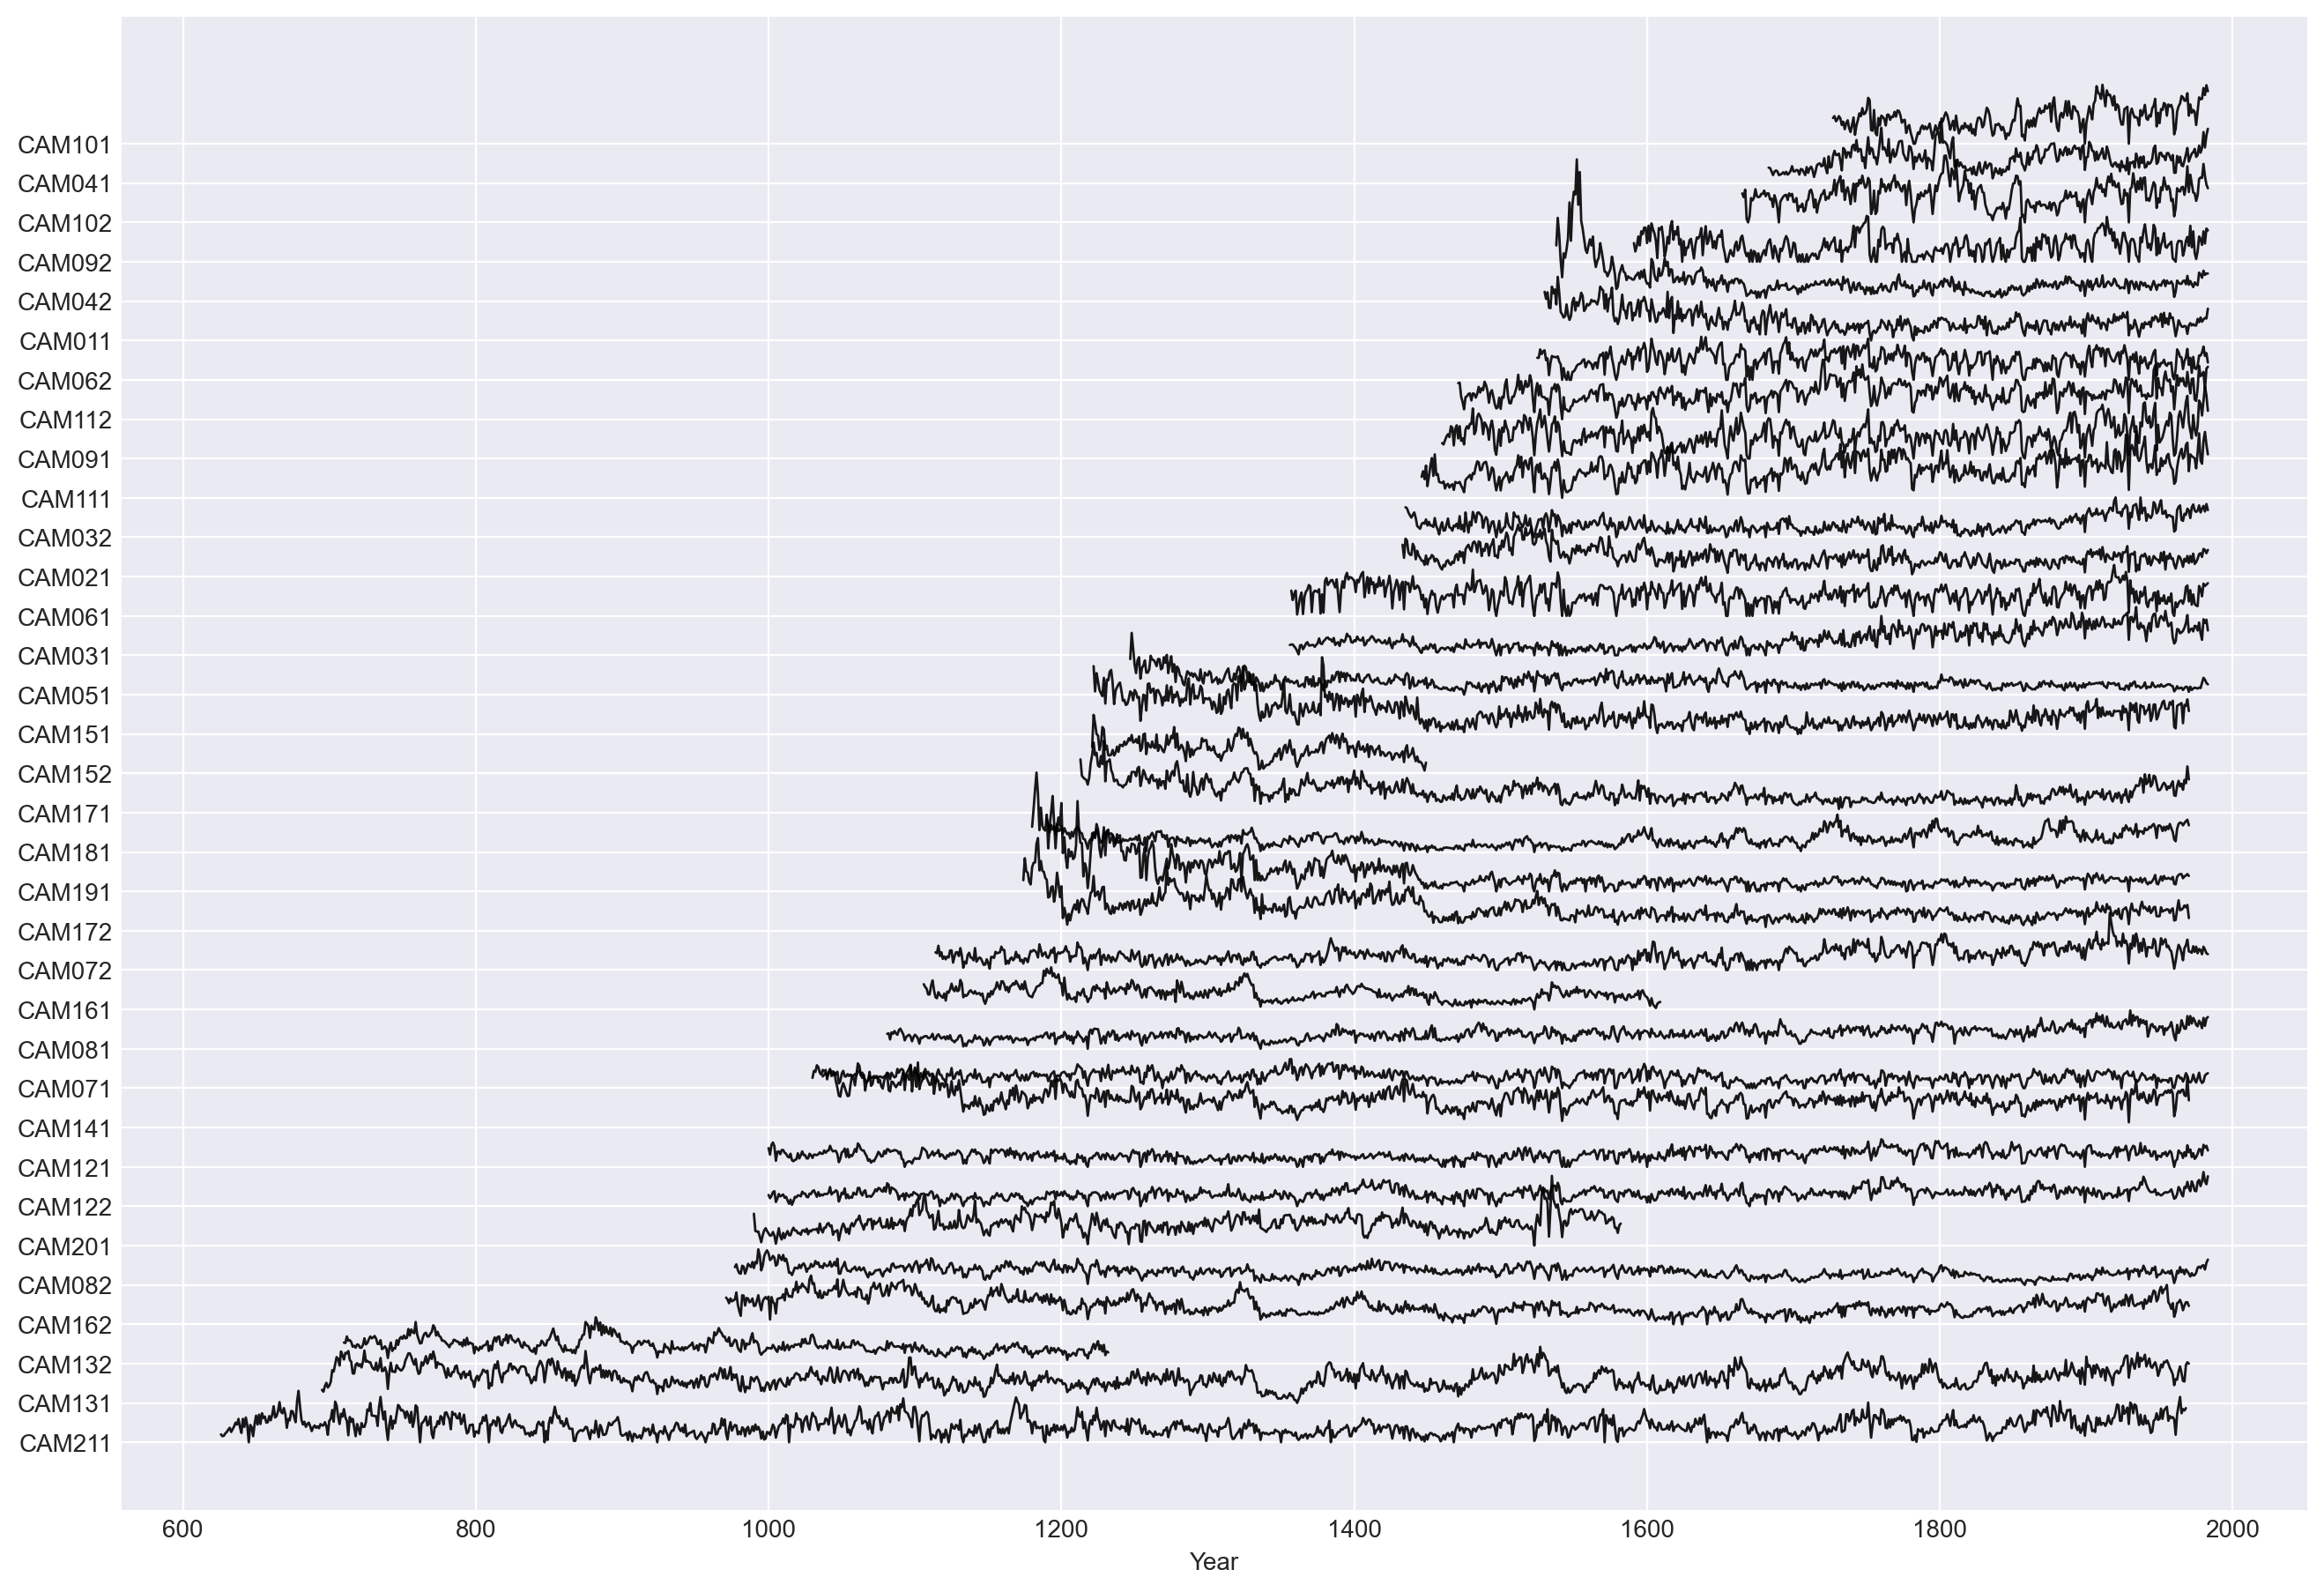

In [12]:
dpl.plot(ca533, type="seg")
dpl.plot(ca533, type="spag")

Of course, detrending is one of the most important functions of DPL.  

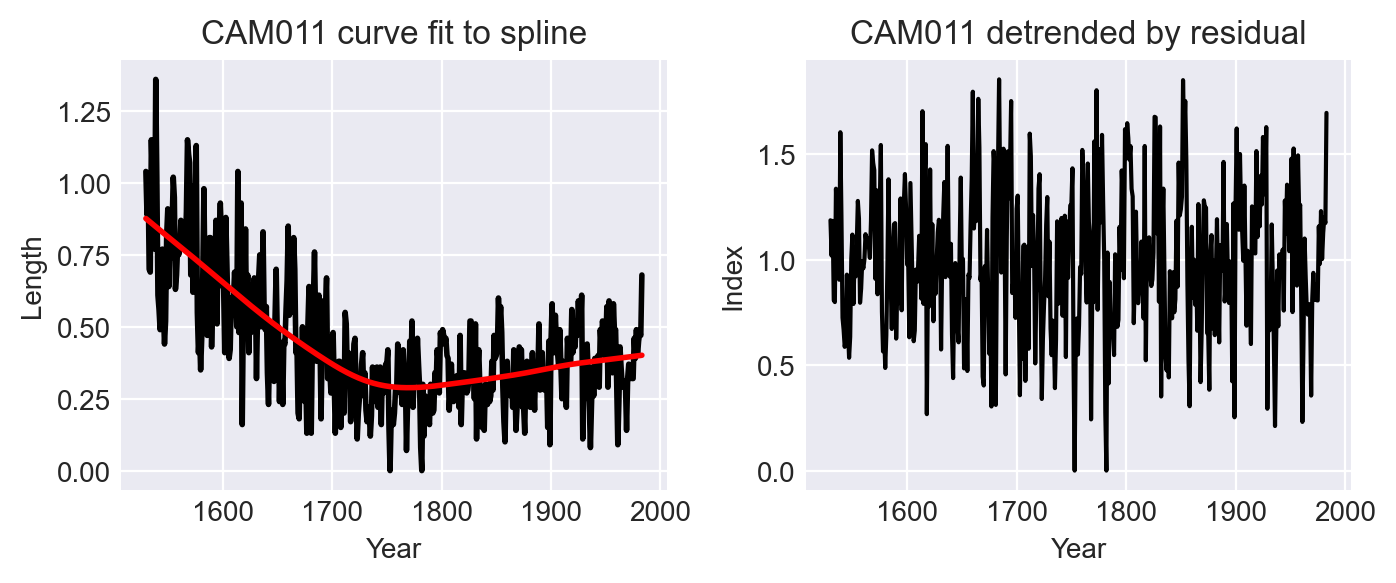

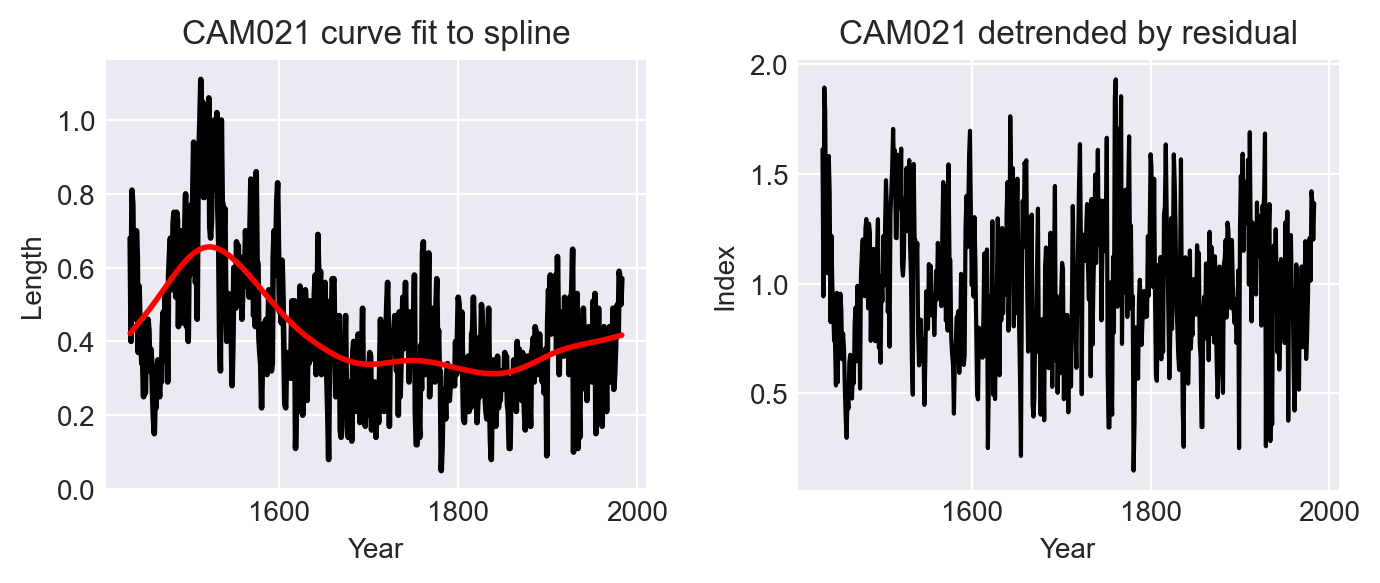

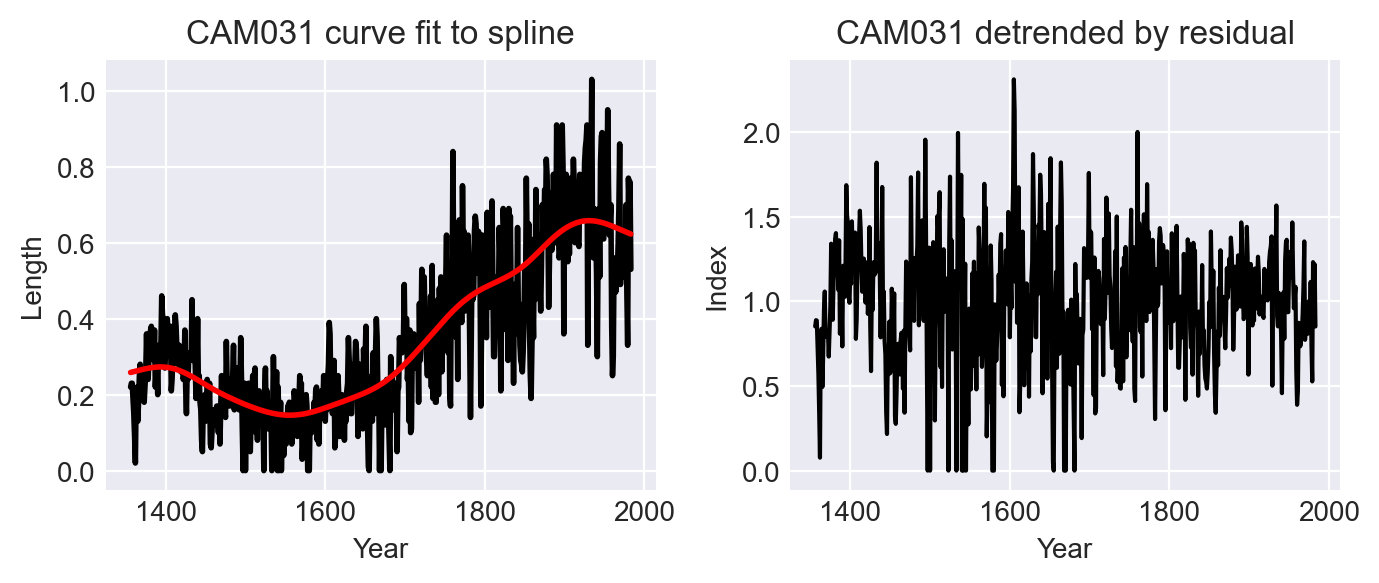

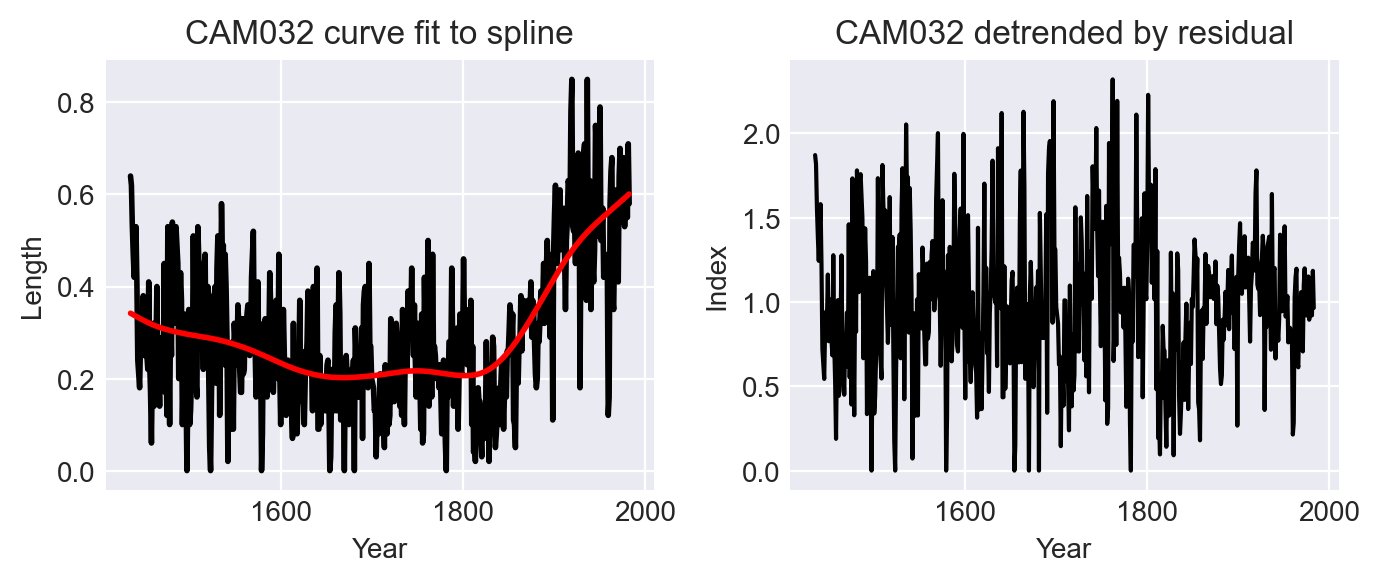

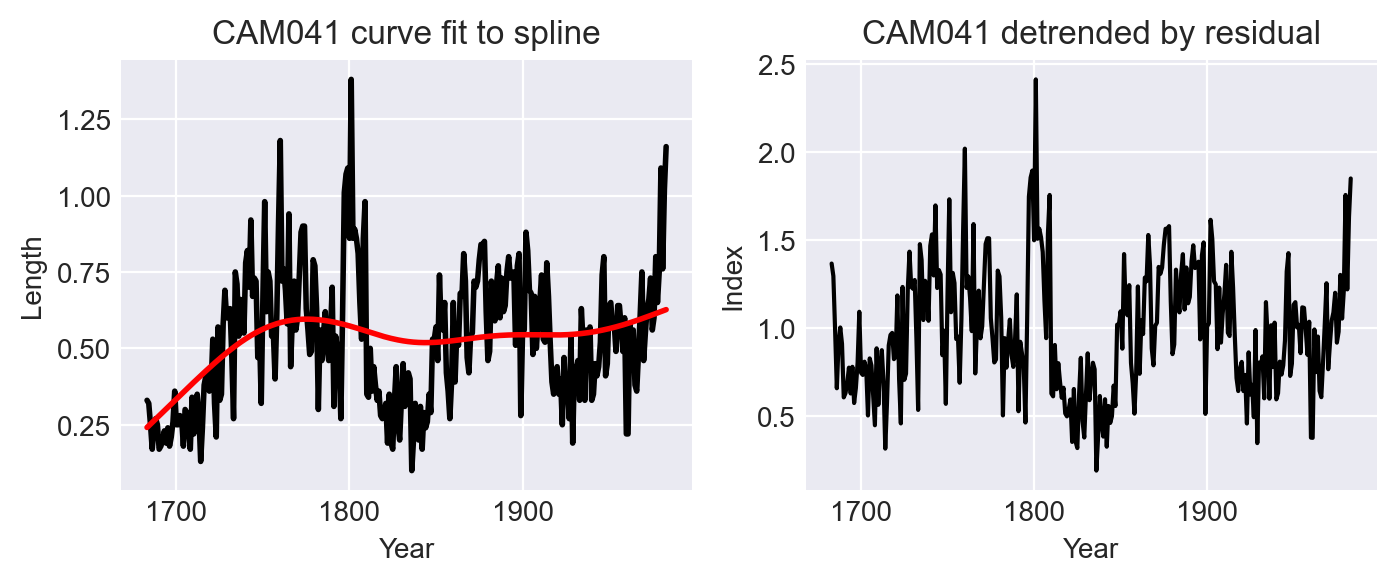

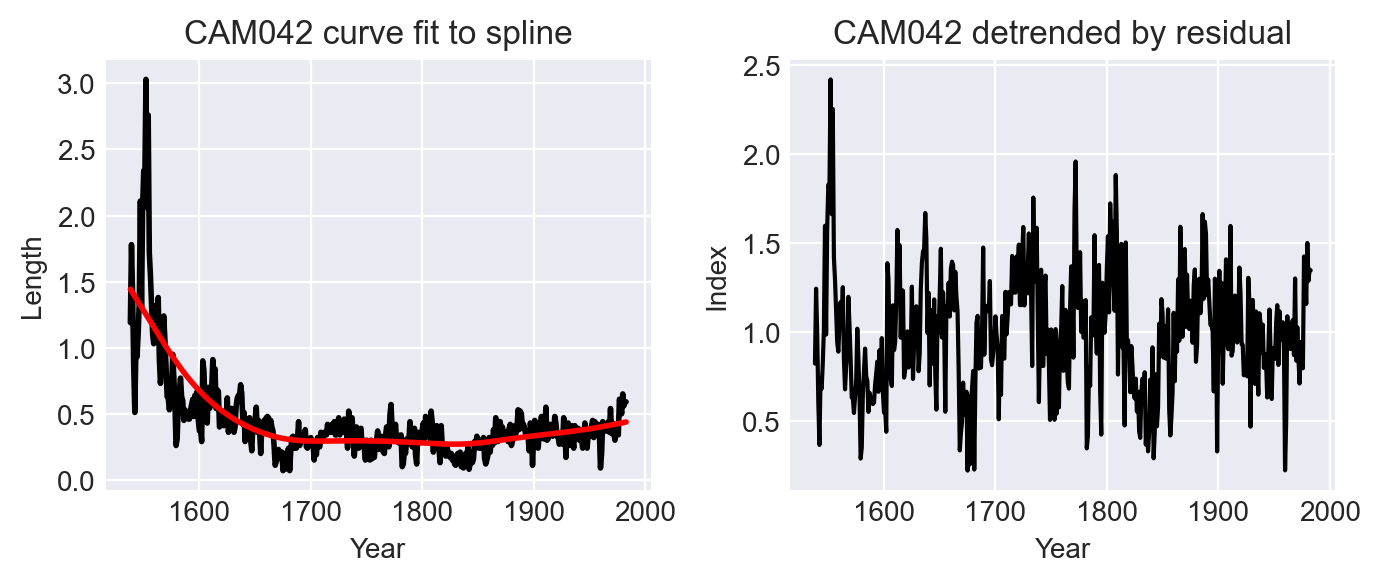

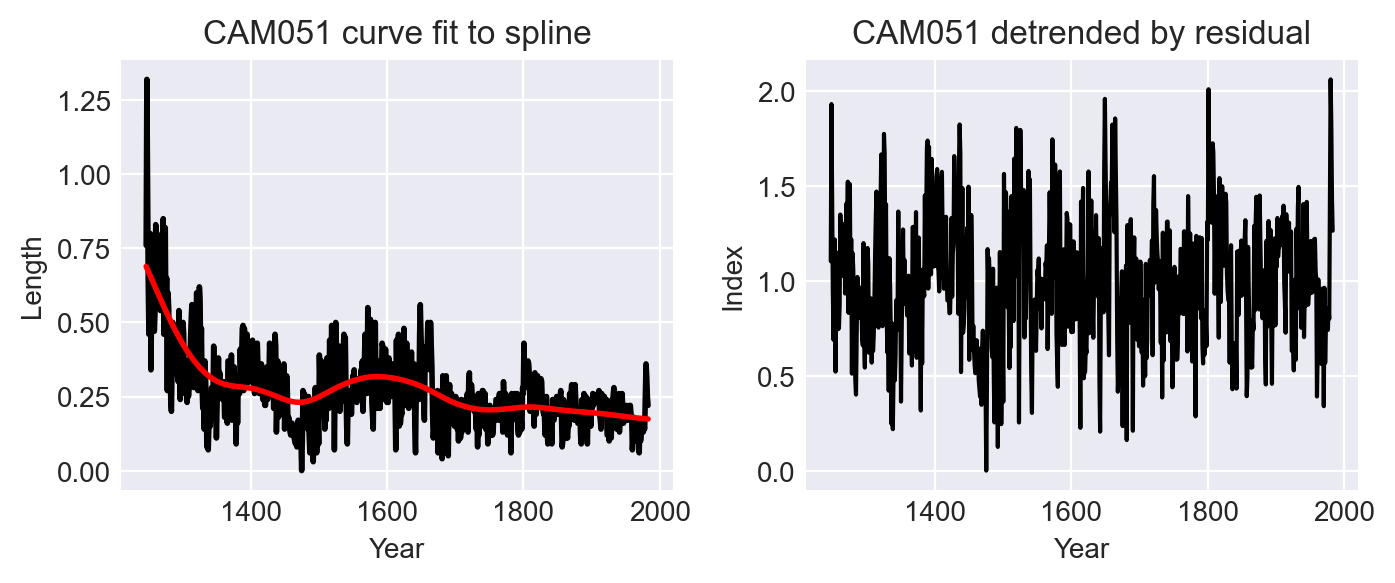

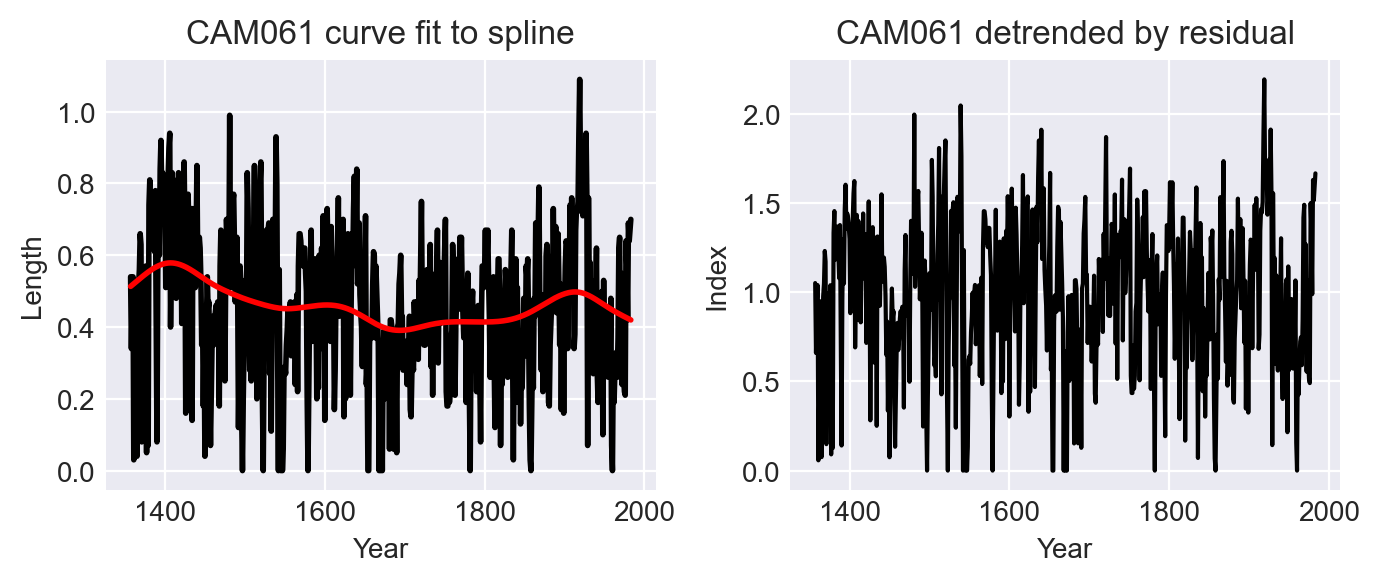

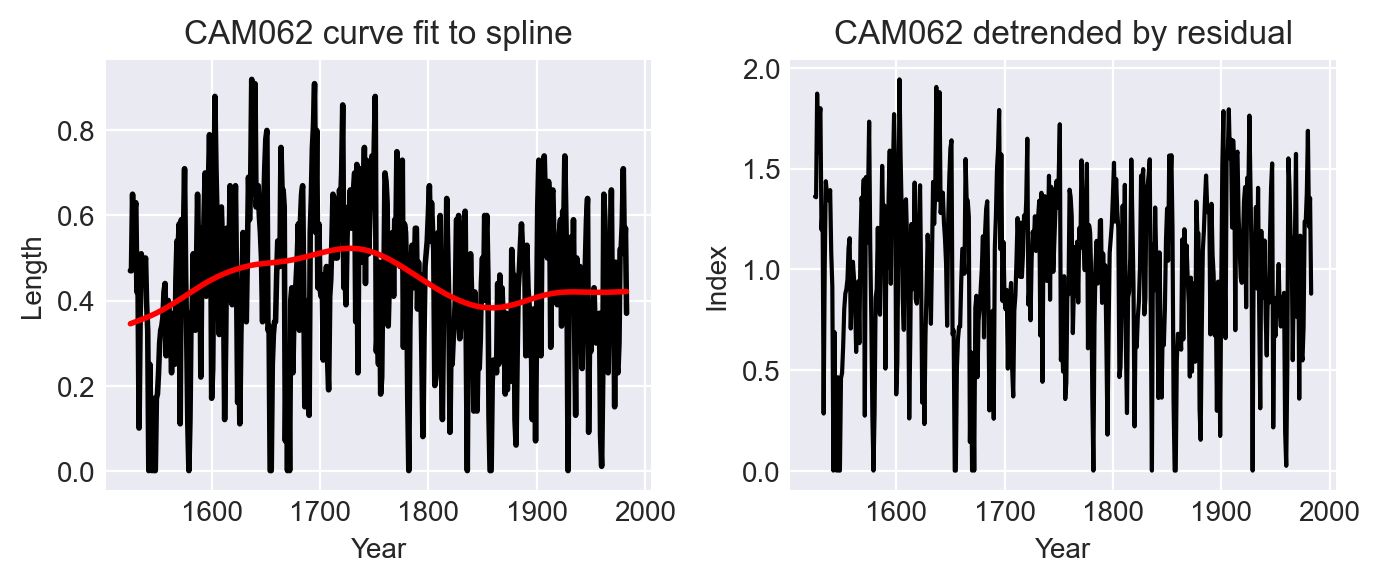

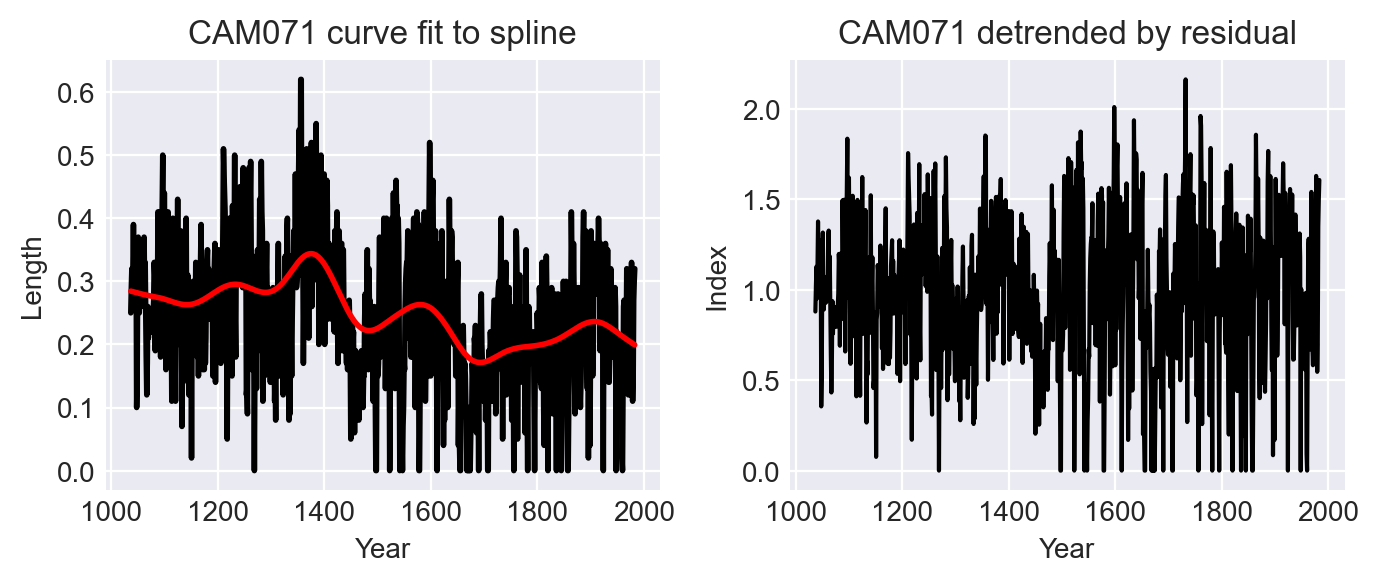

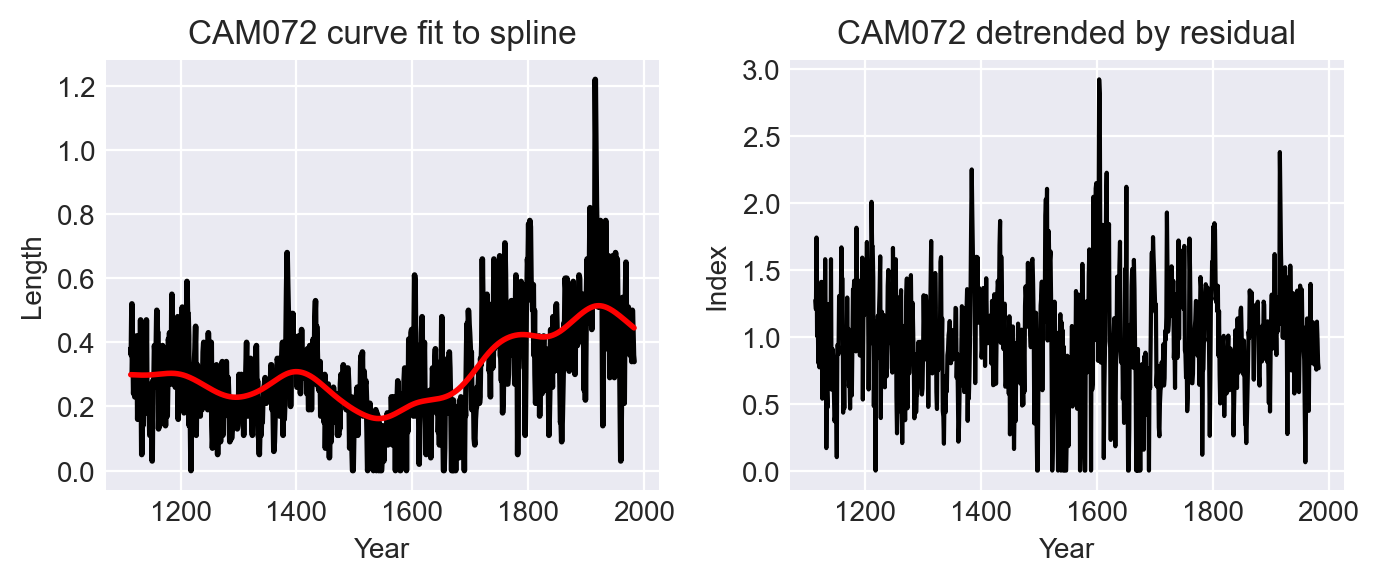

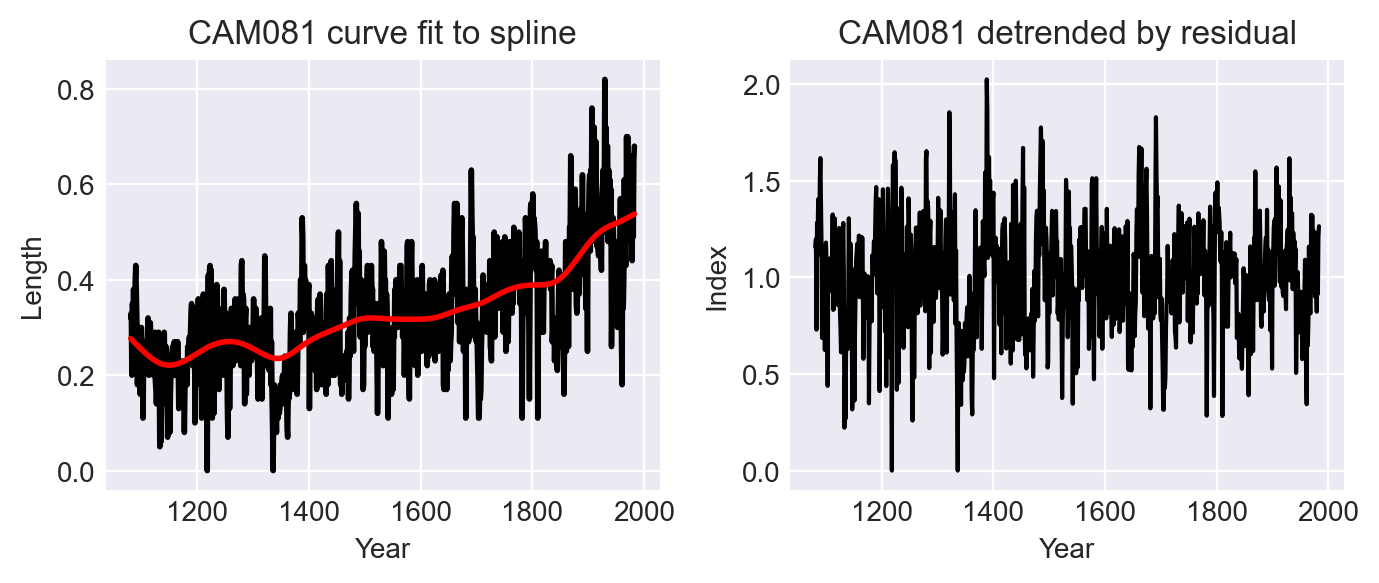

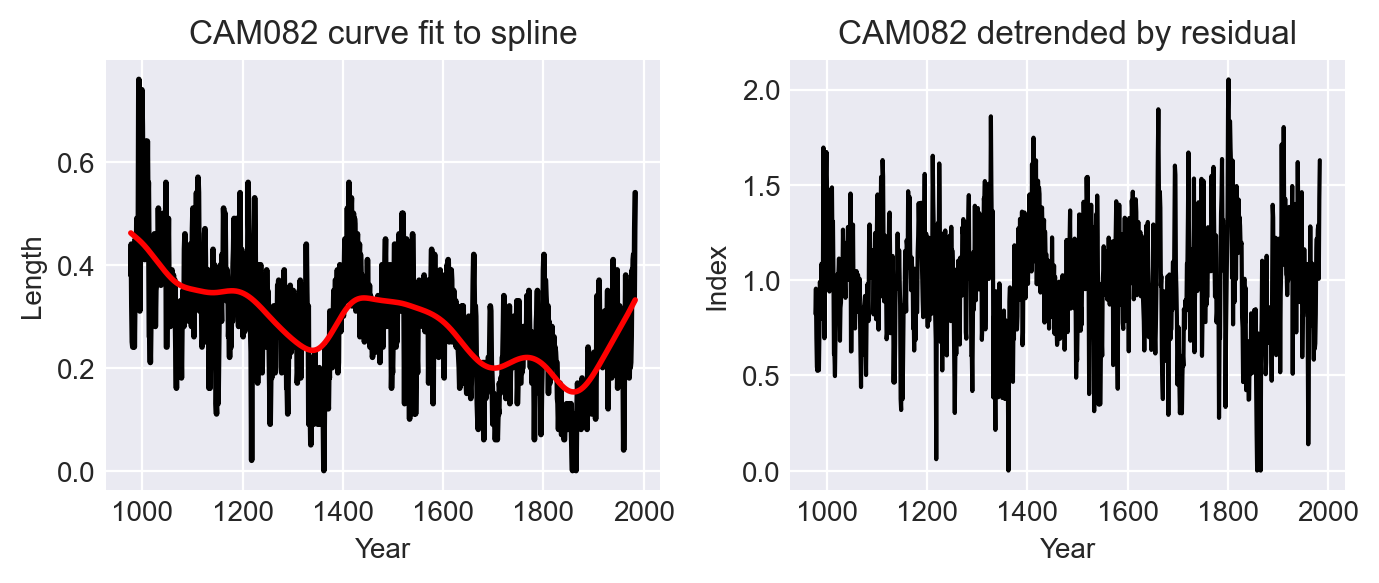

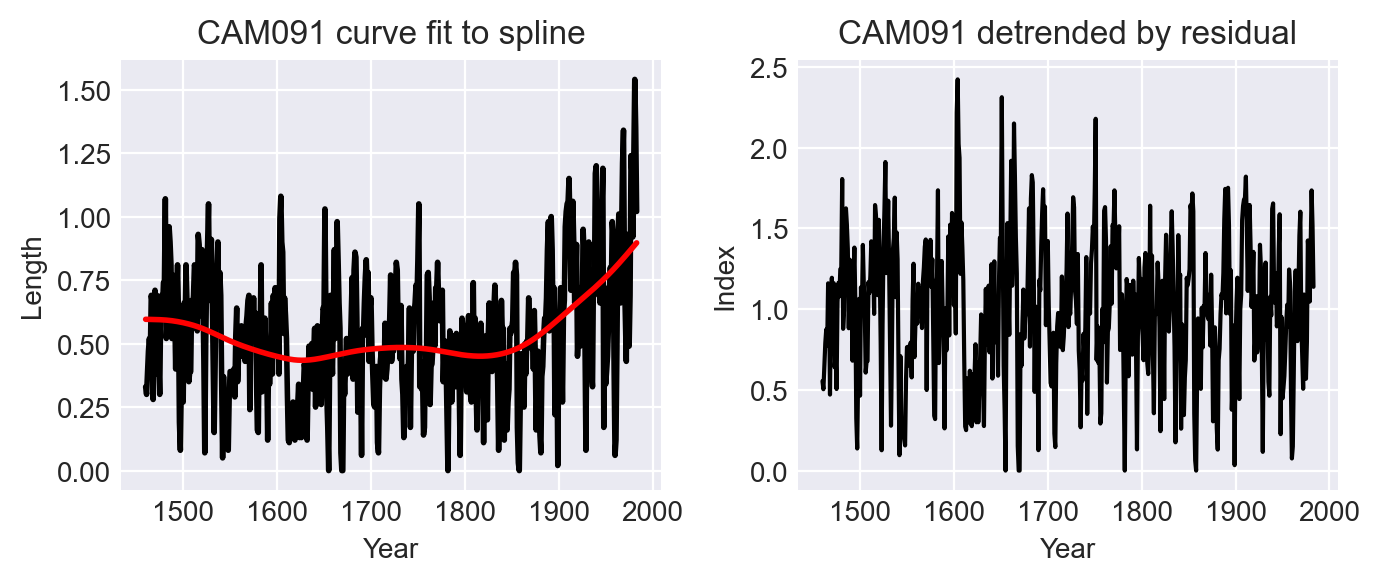

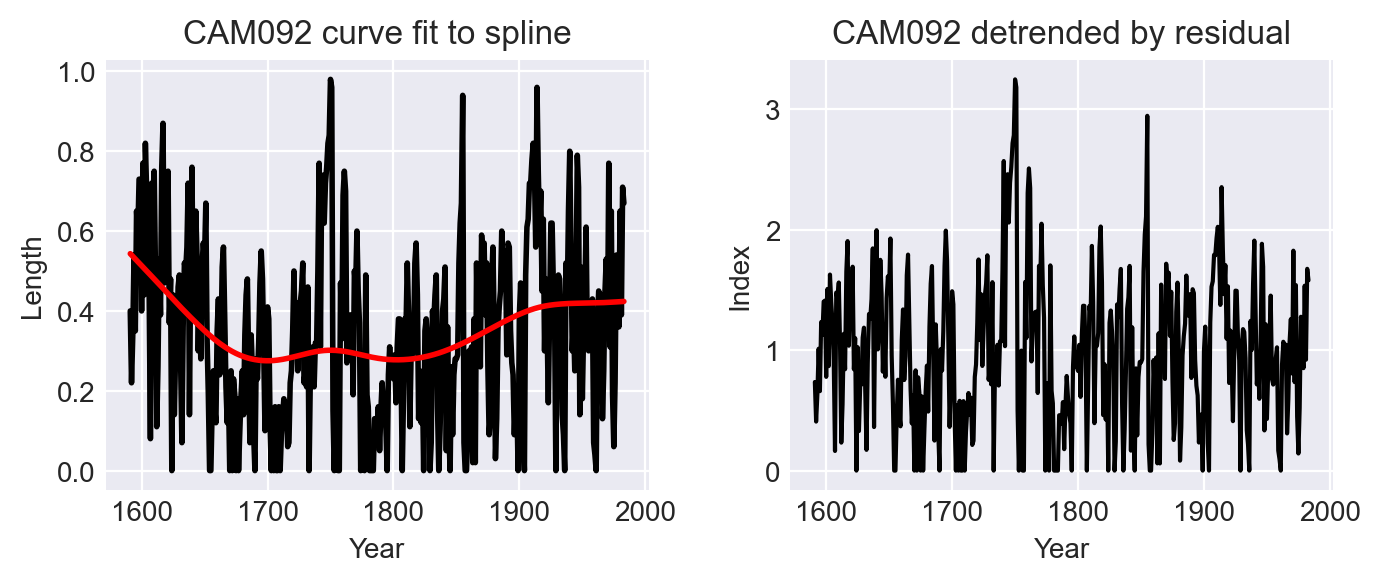

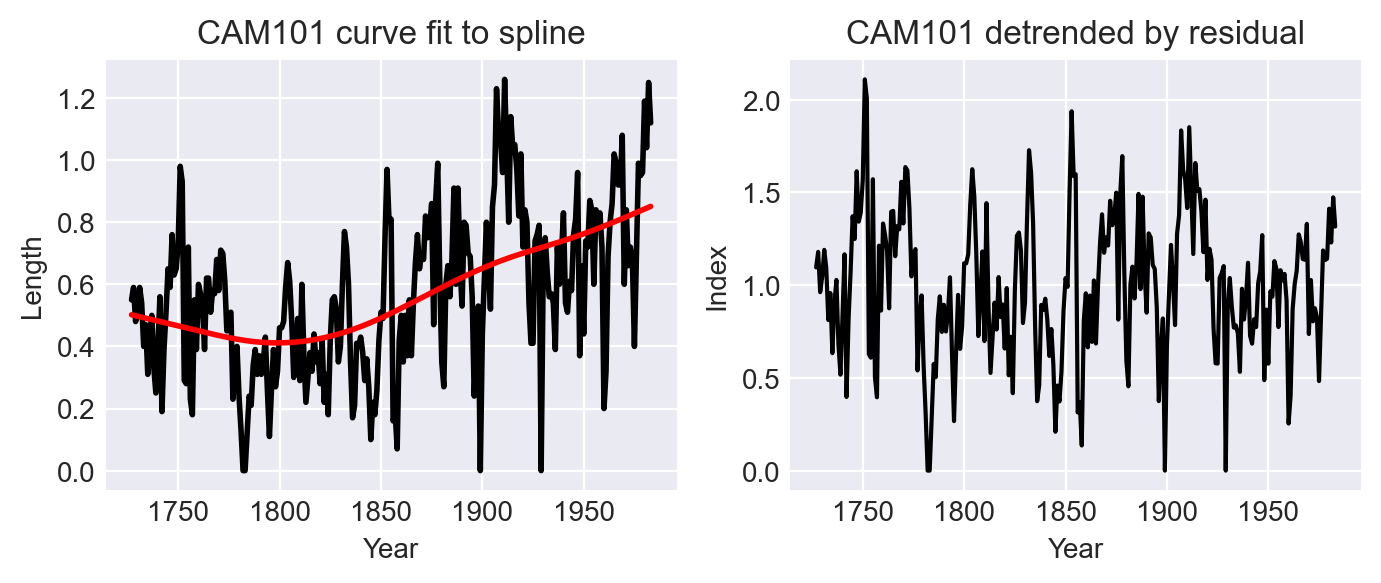

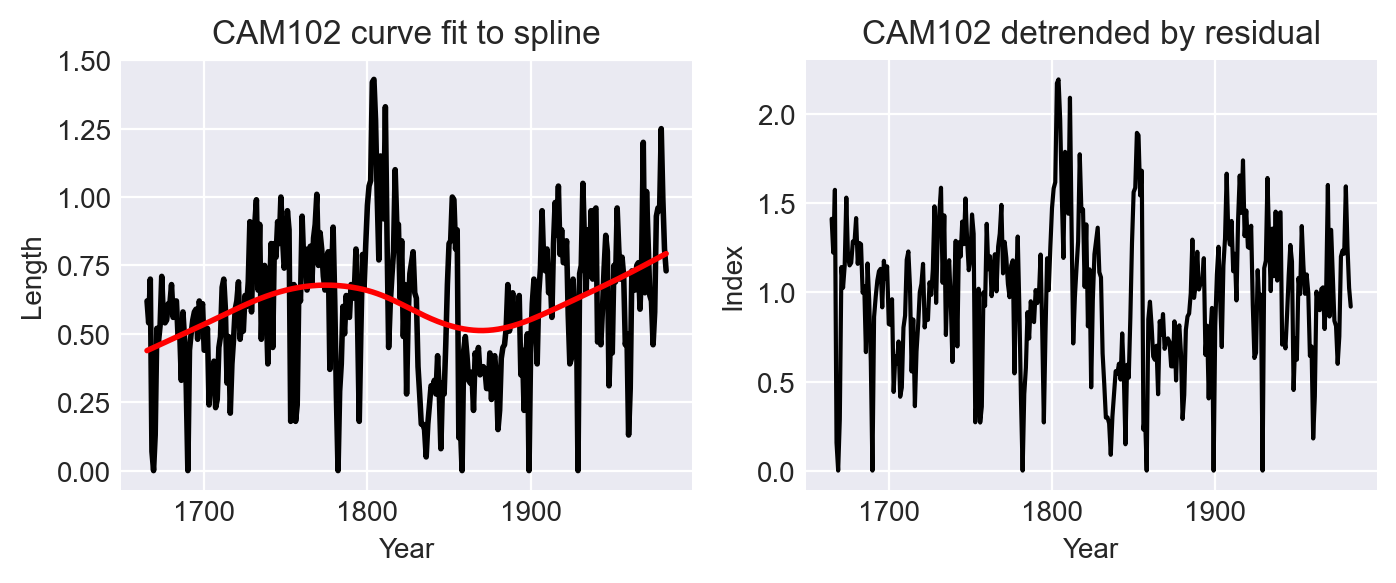

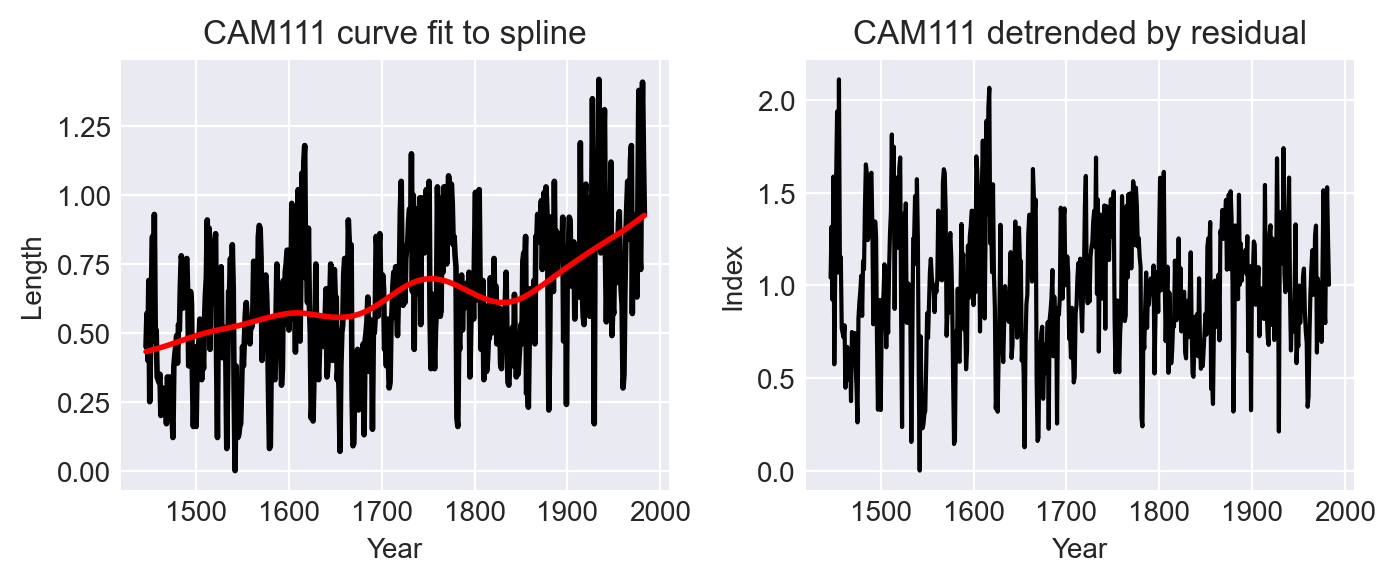

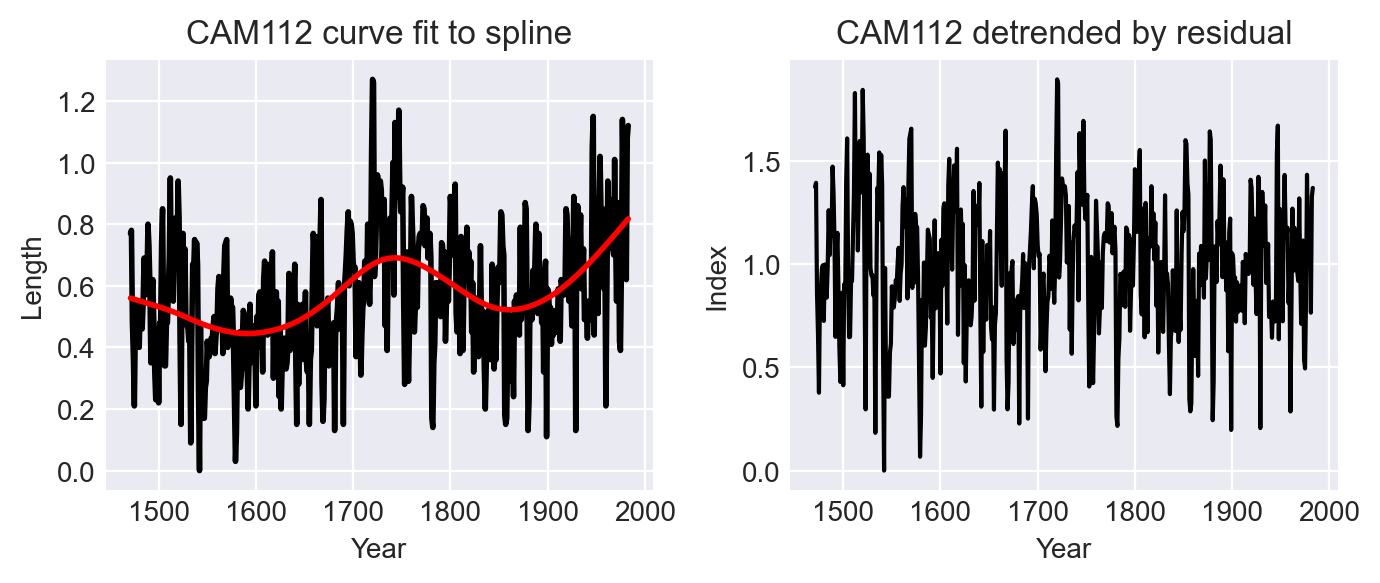

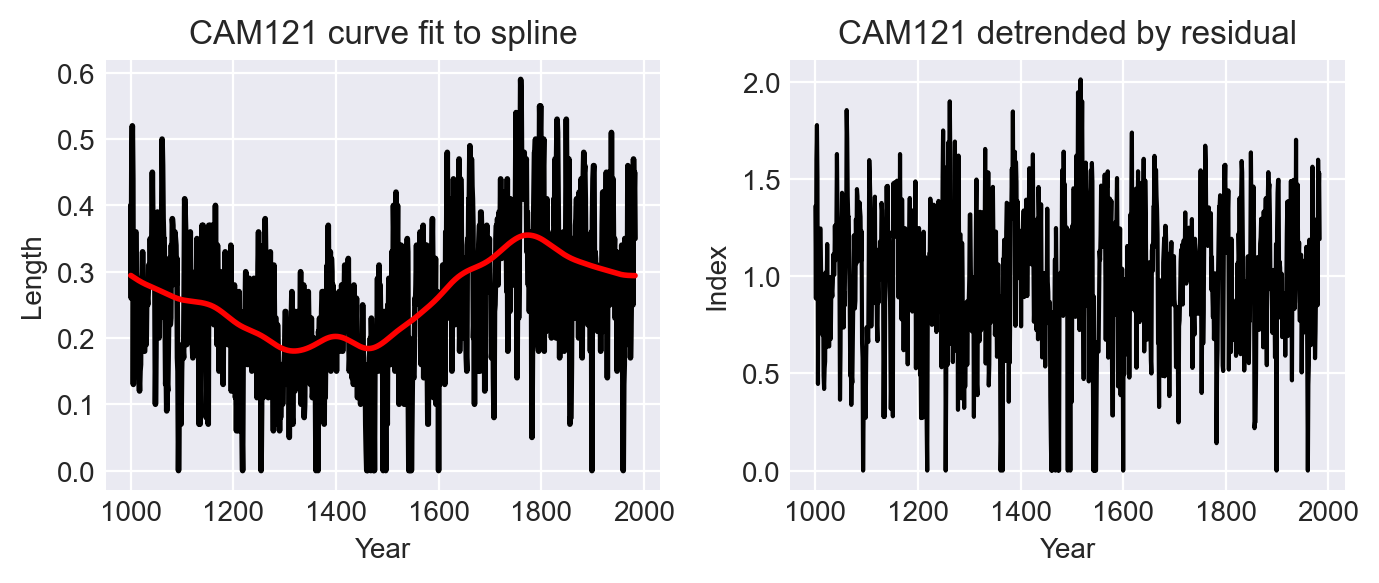

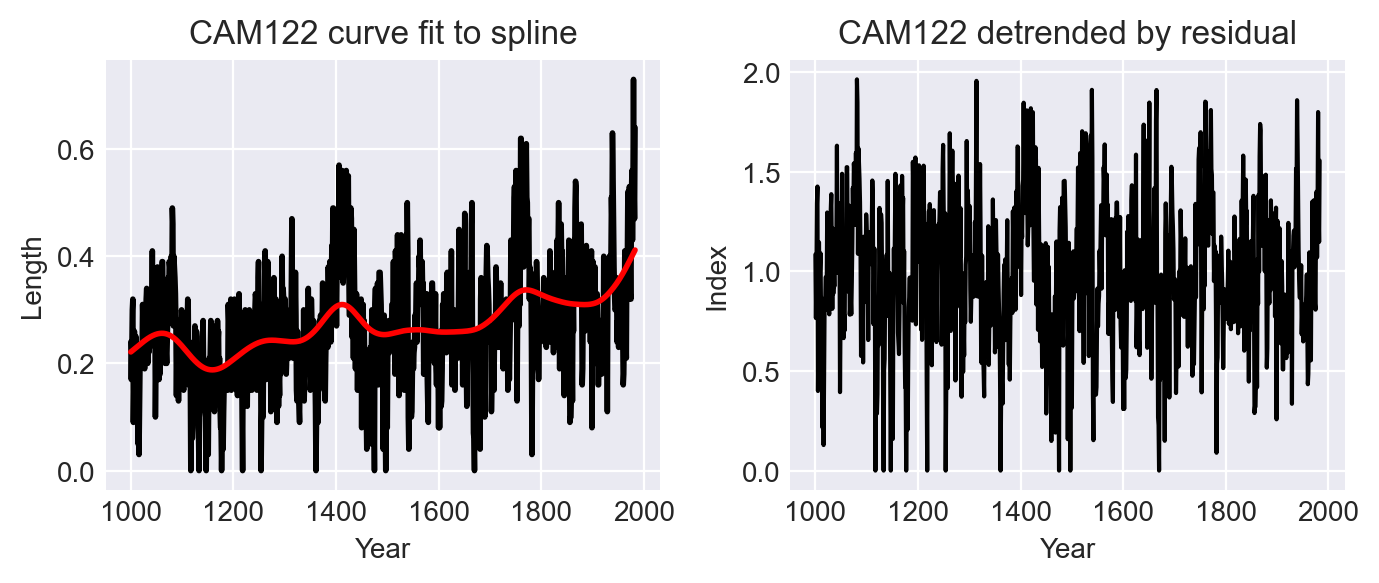

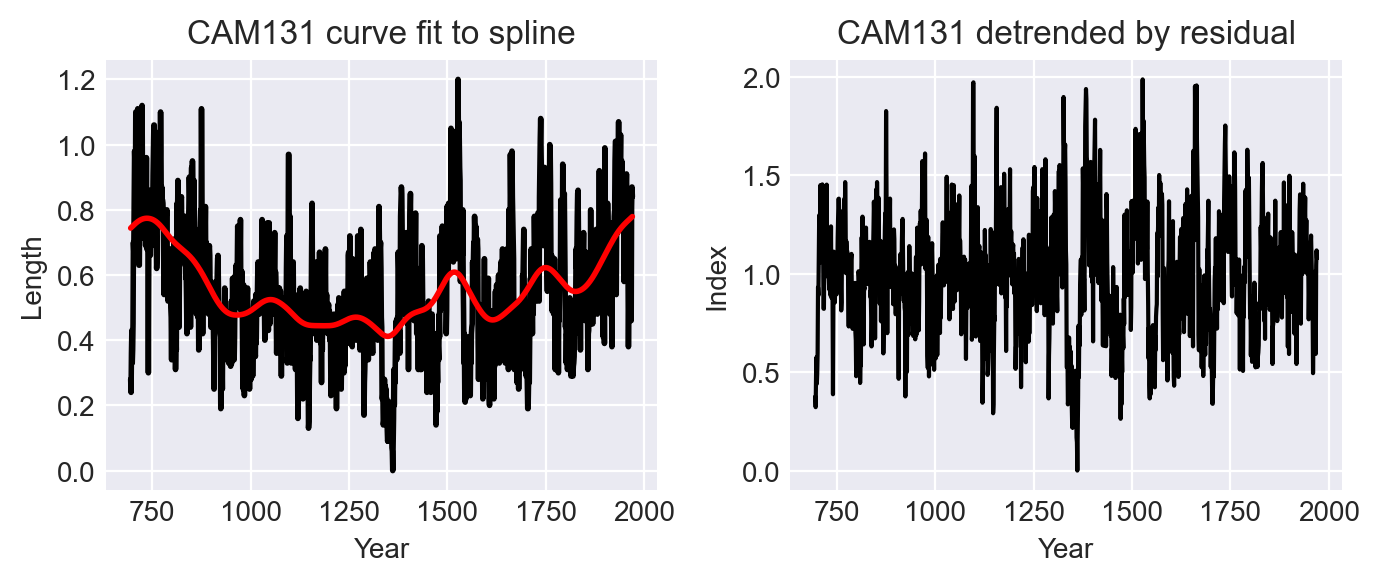

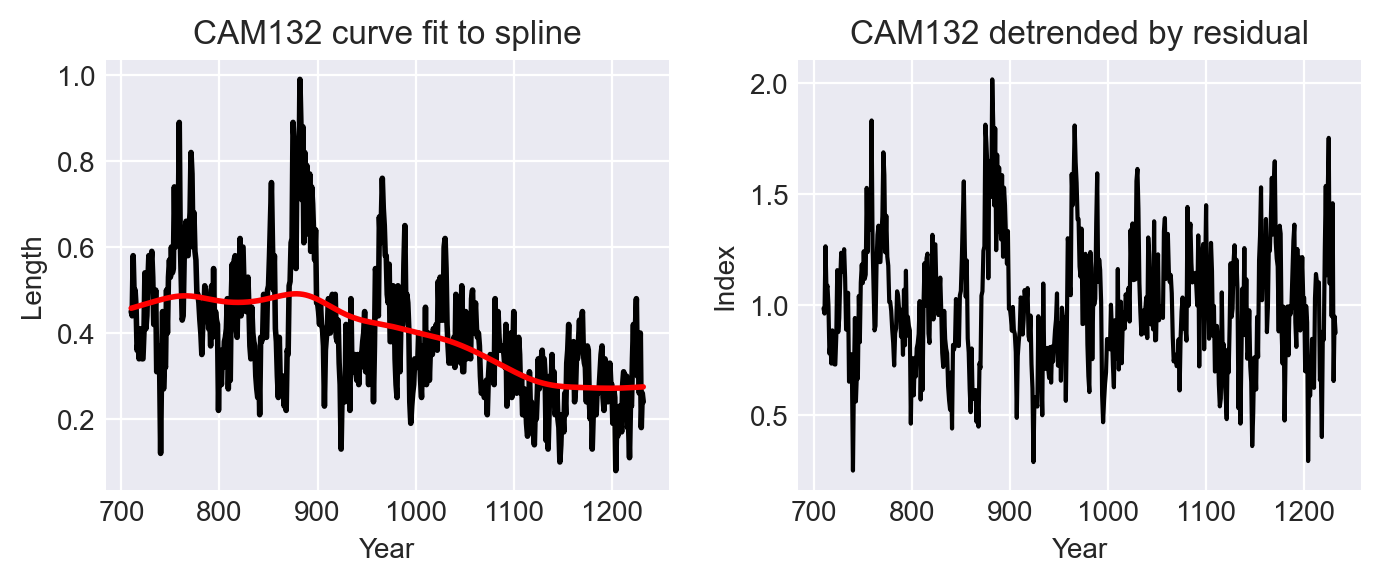

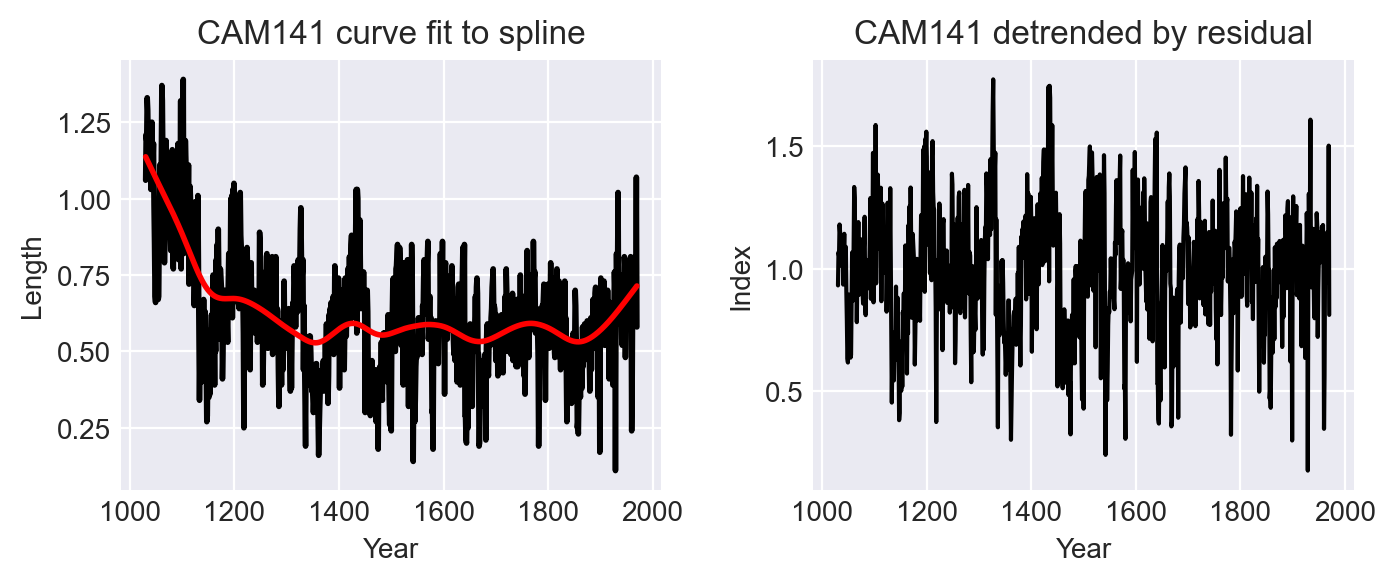

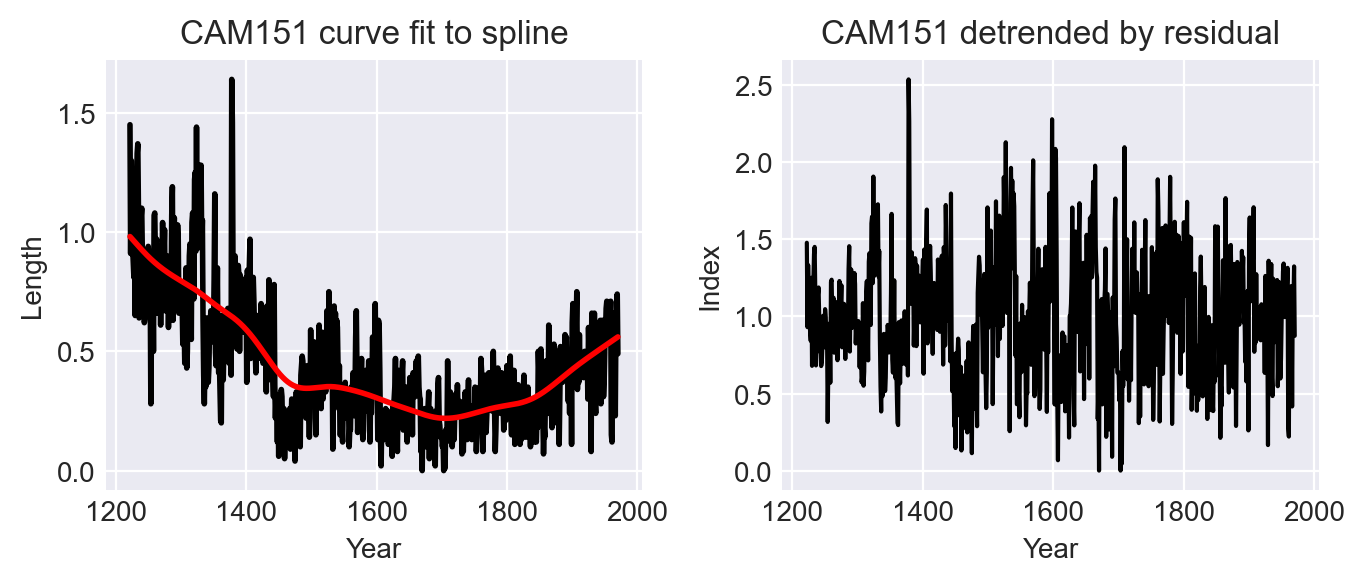

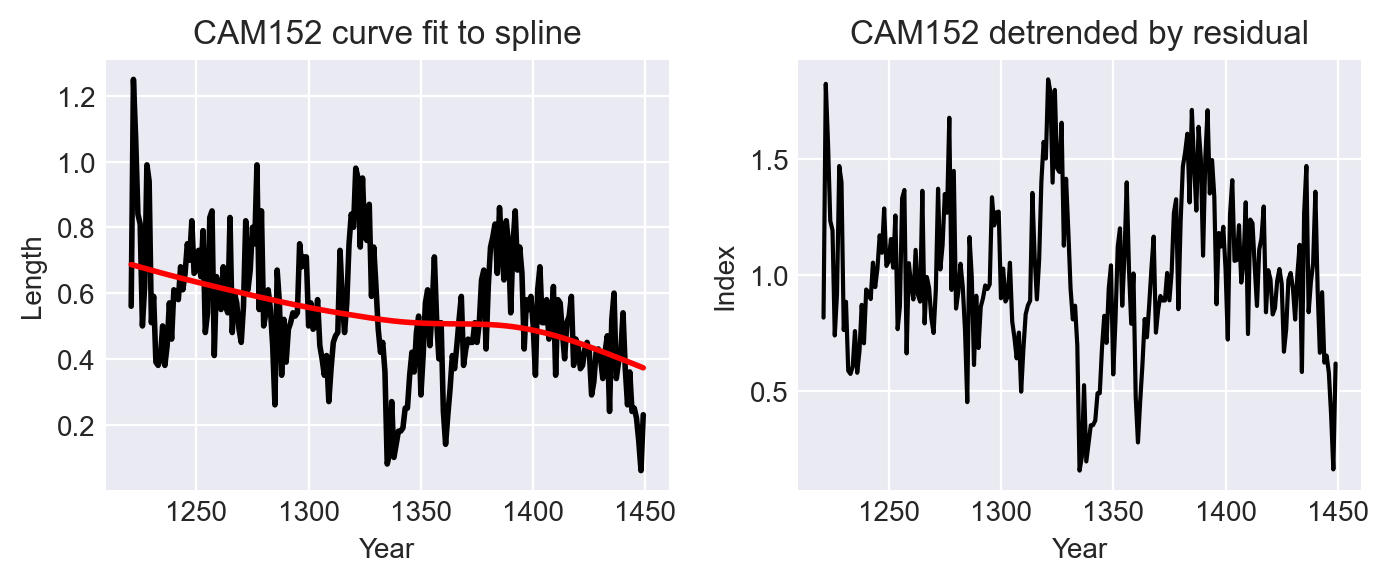

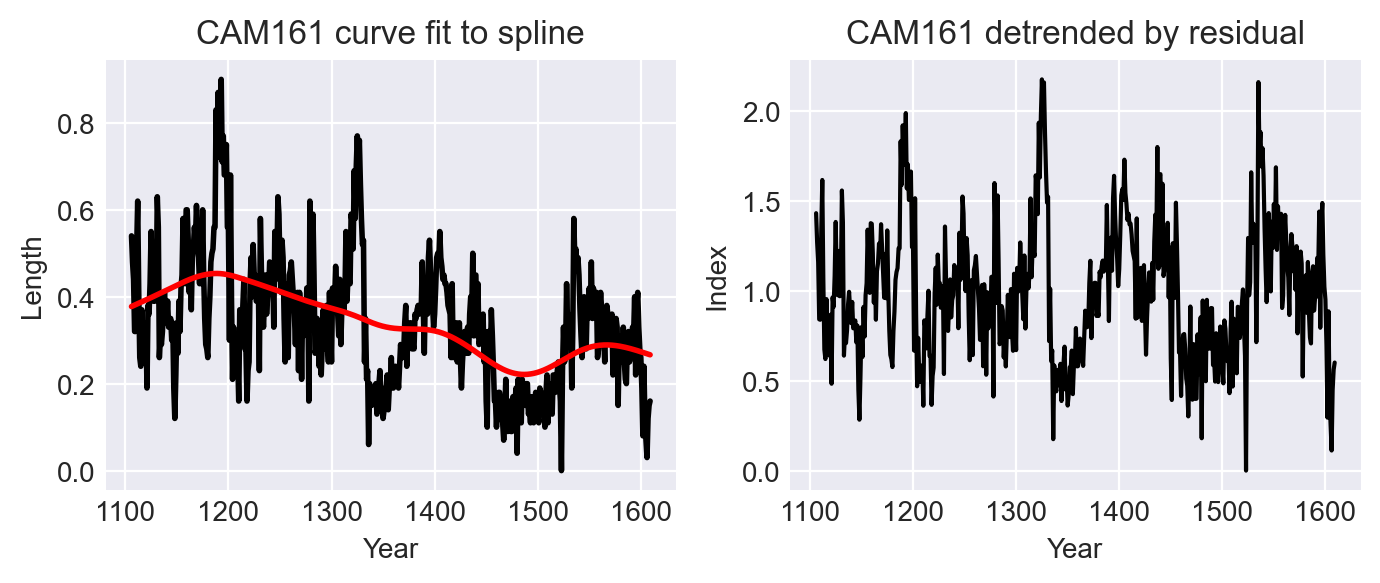

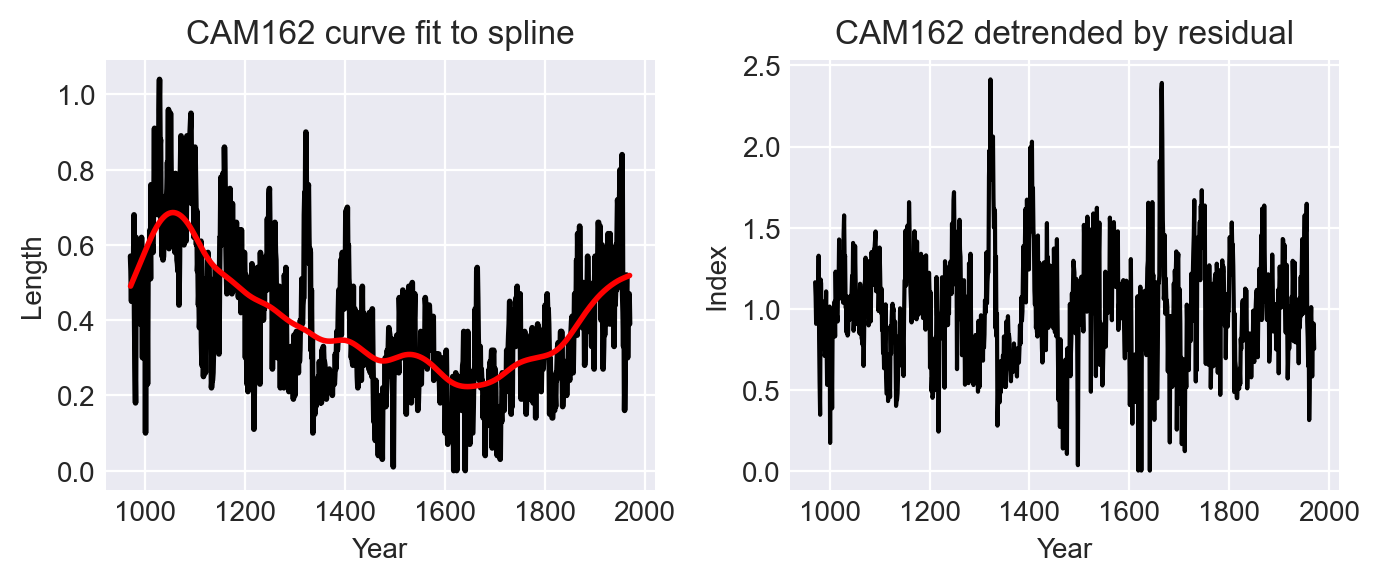

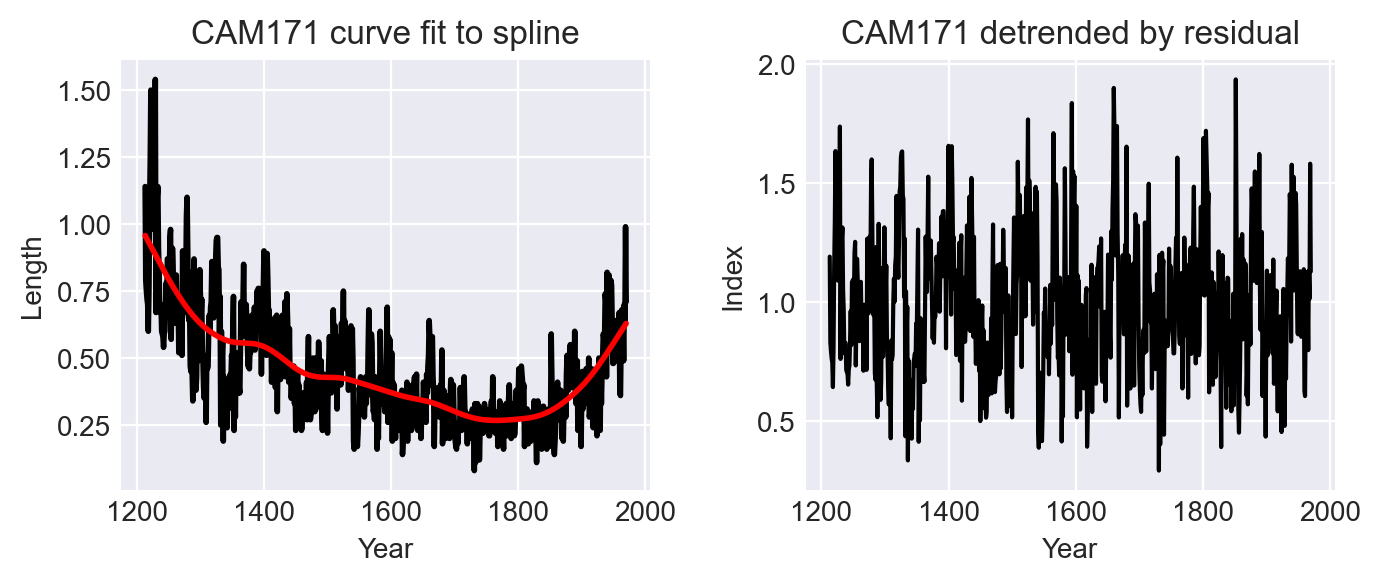

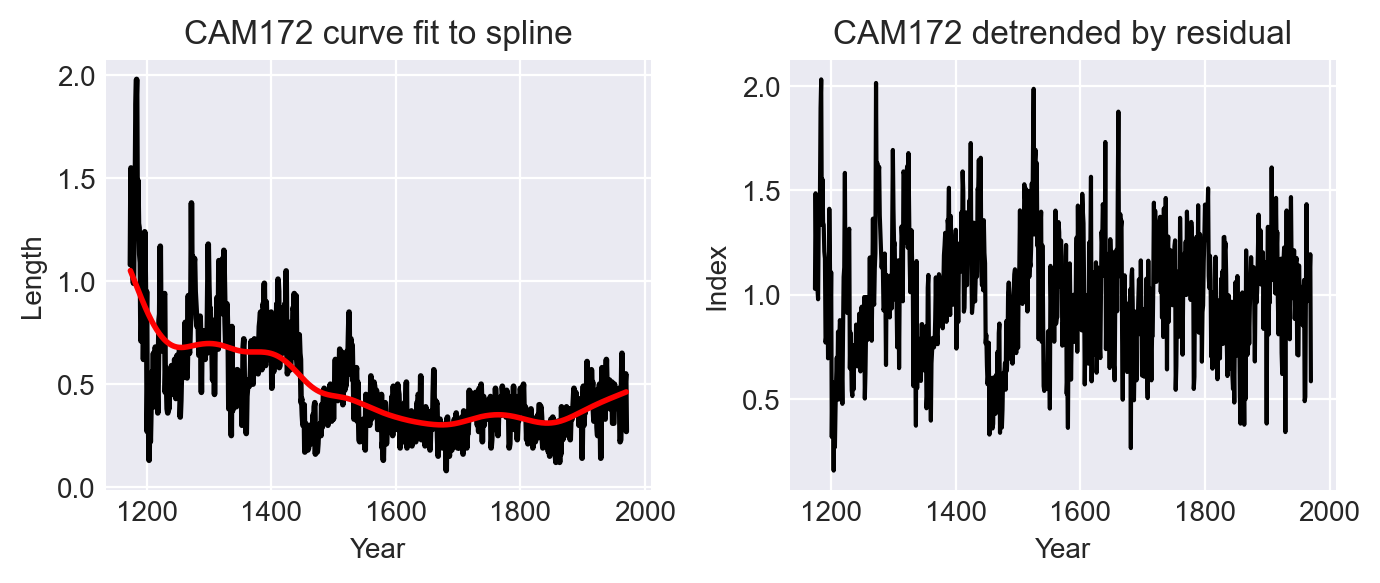

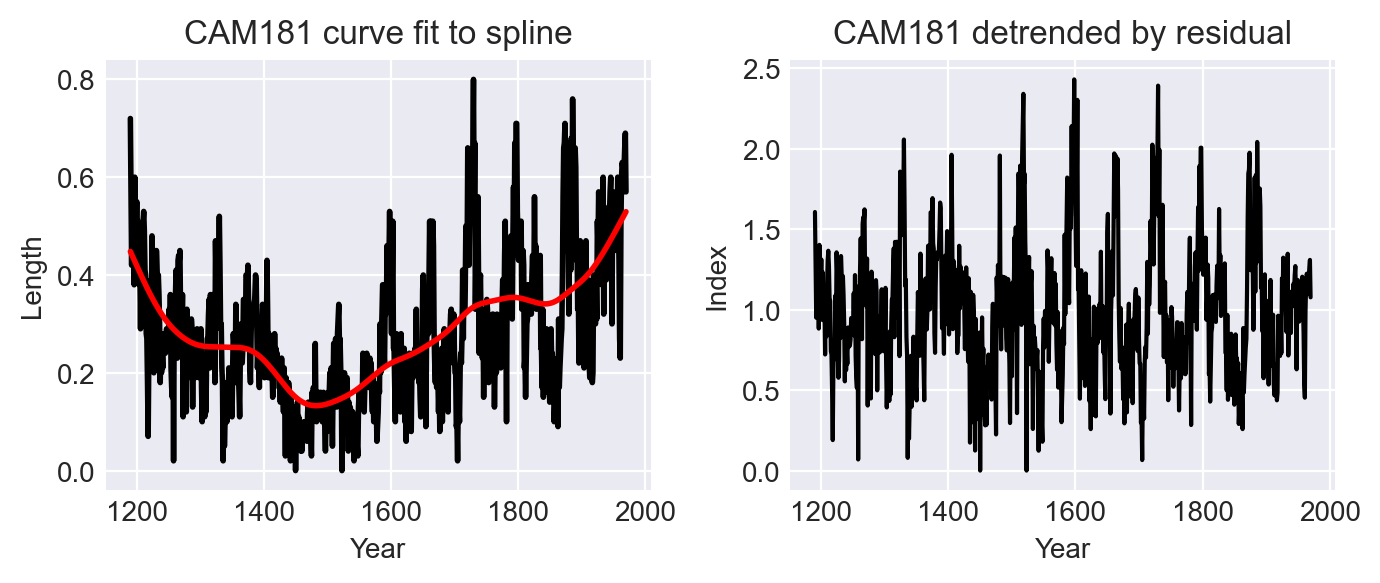

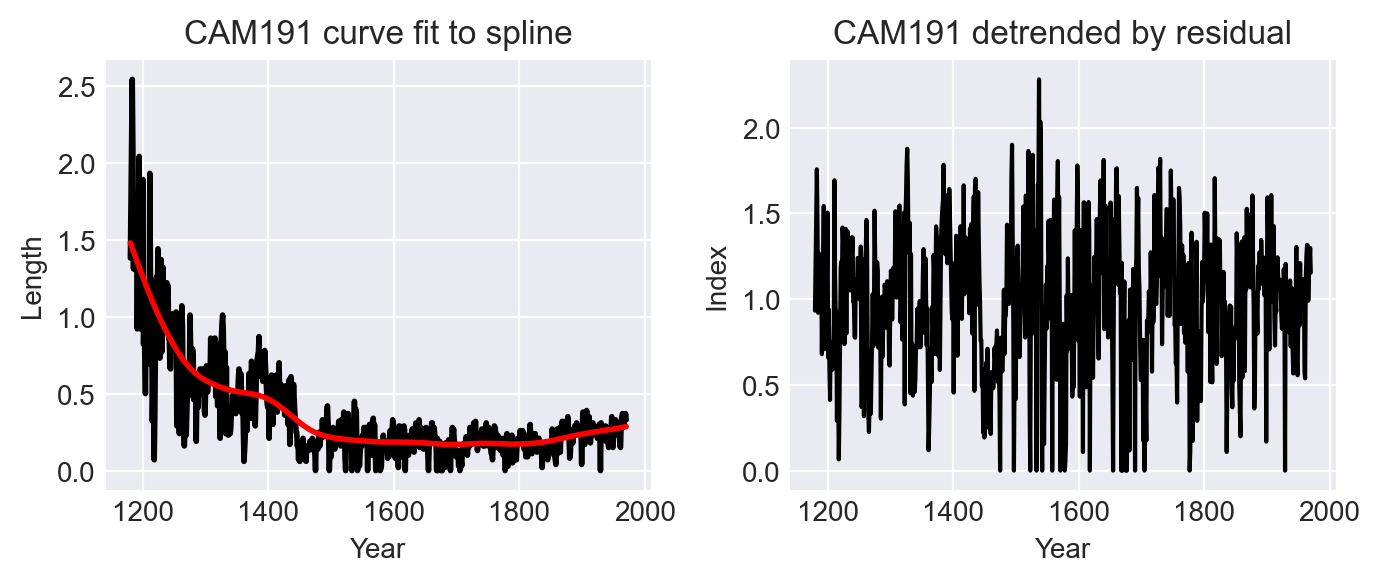

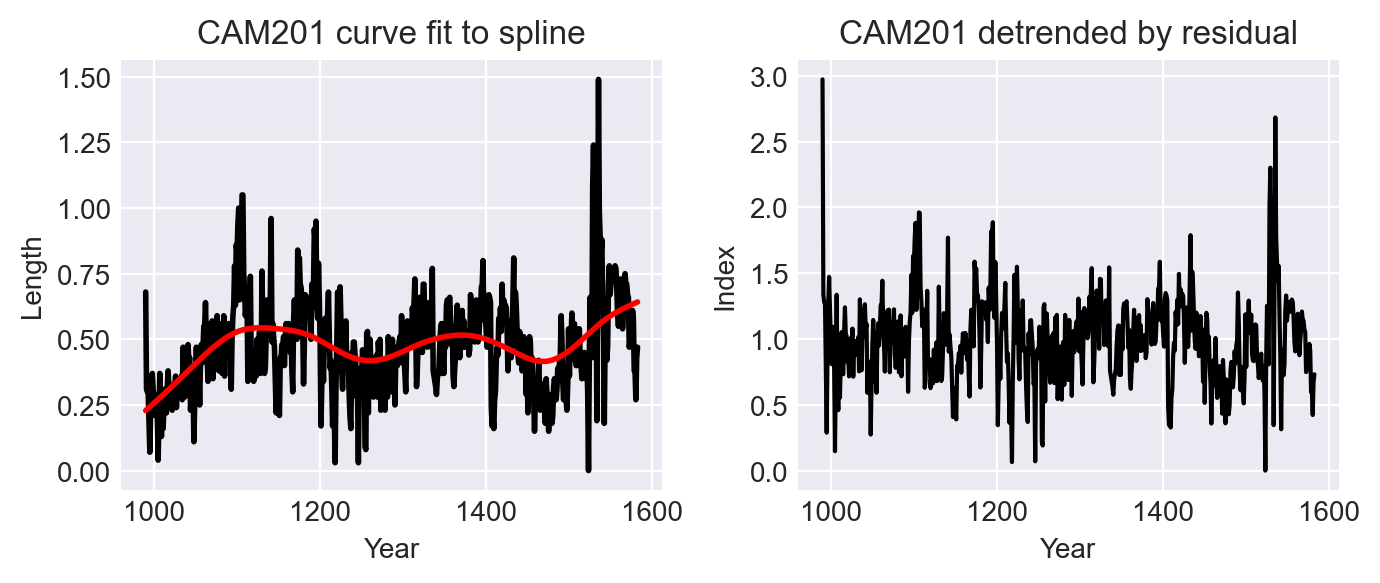

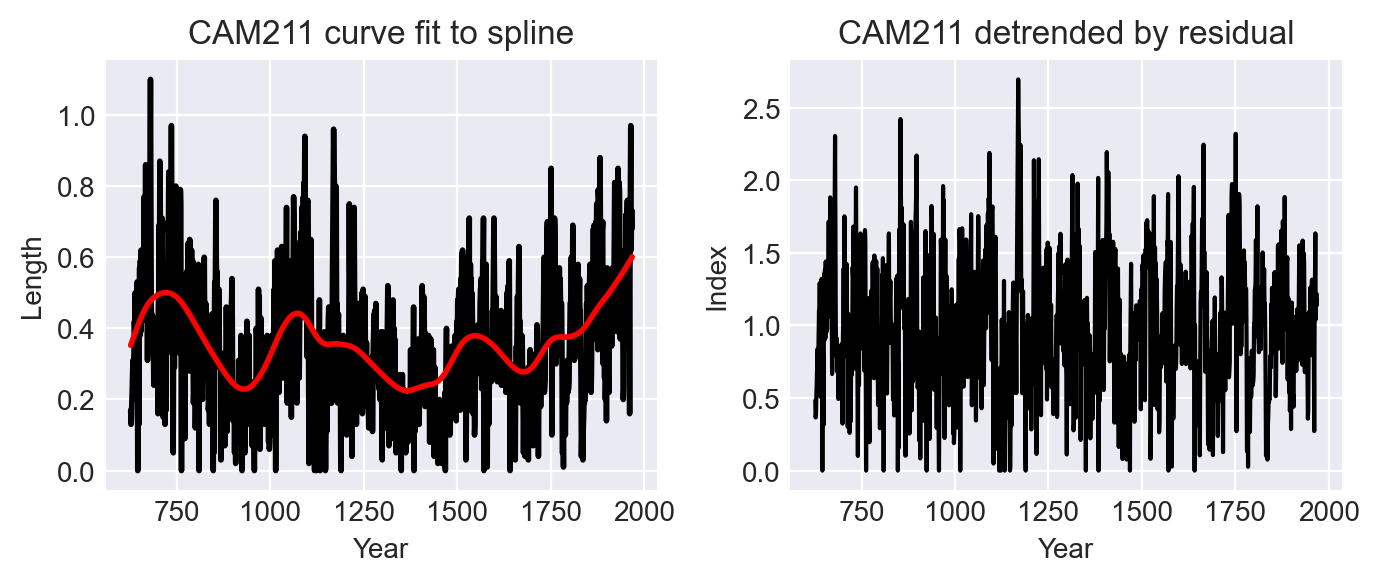

In [13]:
ca533_rwi = dpl.detrend(ca533, fit="spline", period=200, method="residual", plot=True)

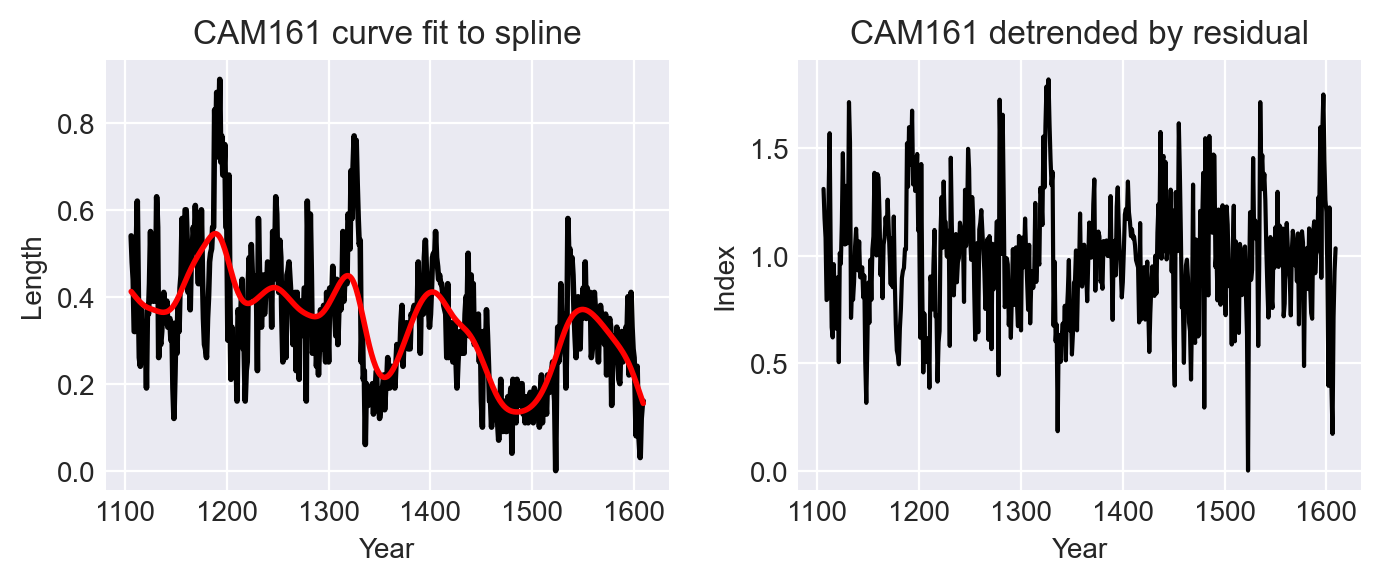

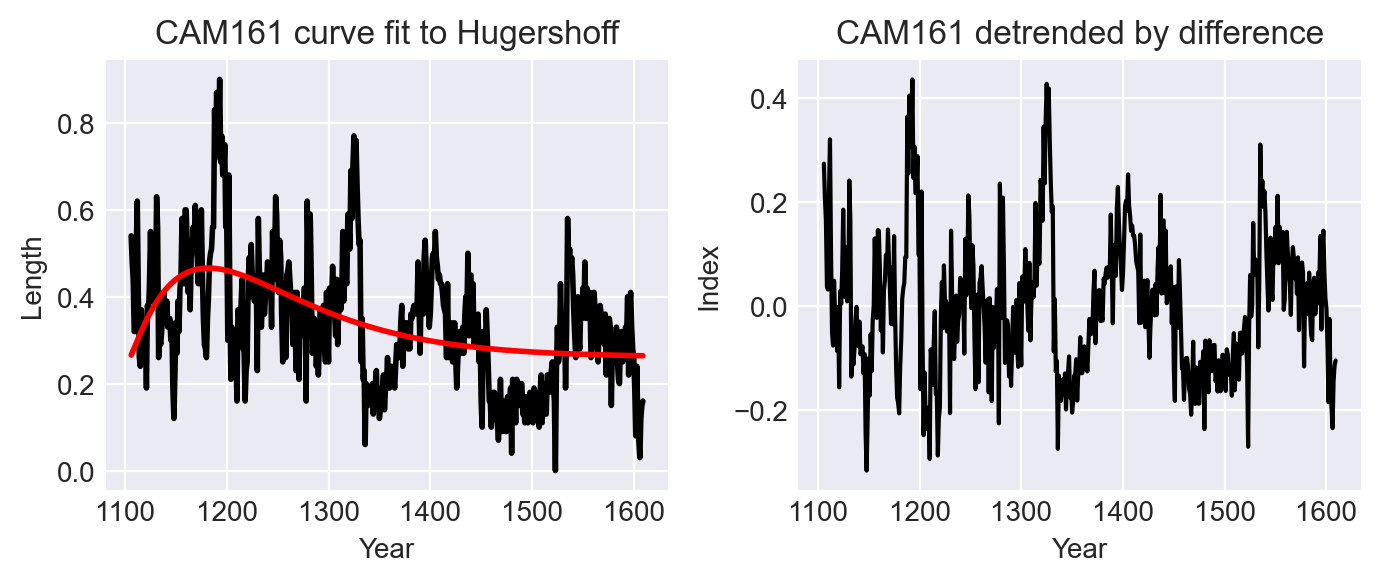

In [41]:
cam161_spline67 = dpl.detrend(ca533["CAM161"], fit="spline", period=-67,method="residual", plot=True)
cam161_negex = dpl.detrend(ca533["CAM161"], fit="Hugershoff", method="difference", plot=True)

In [40]:
cam161_negex_res = dpl.ar_func(cam161_negex)
plot(cam161_negex_res)

NameError: name 'plot' is not defined

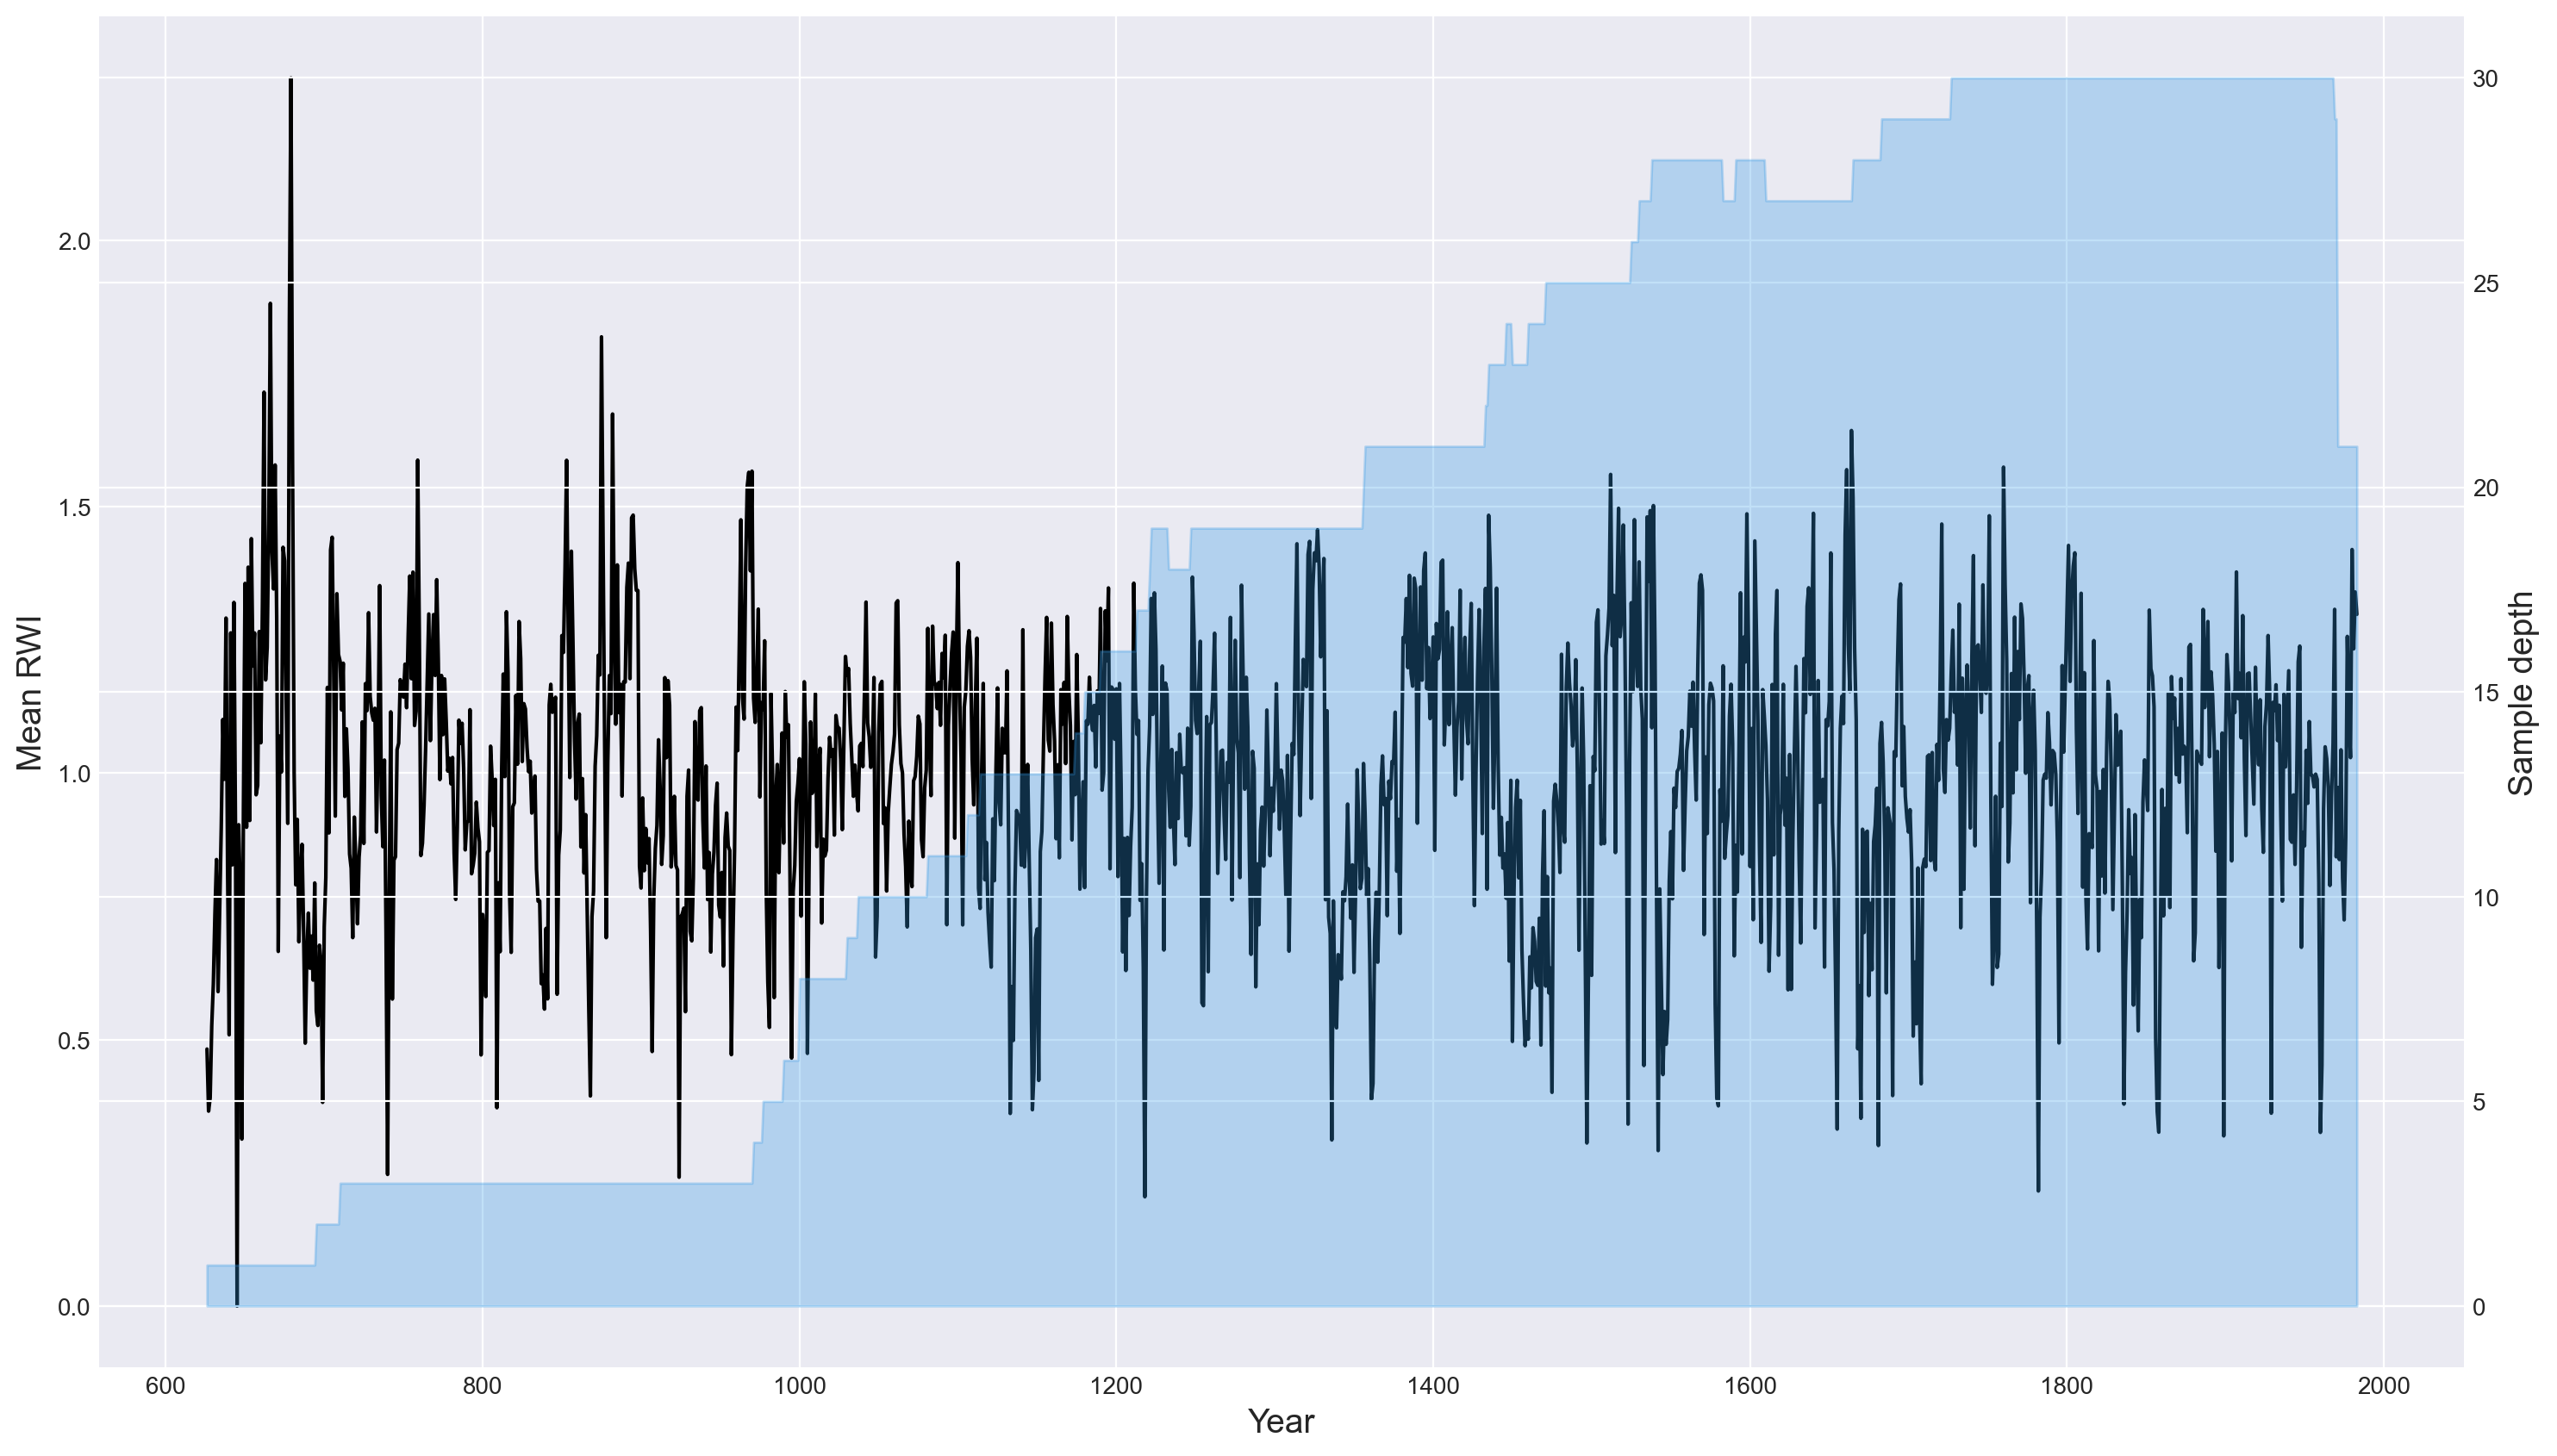

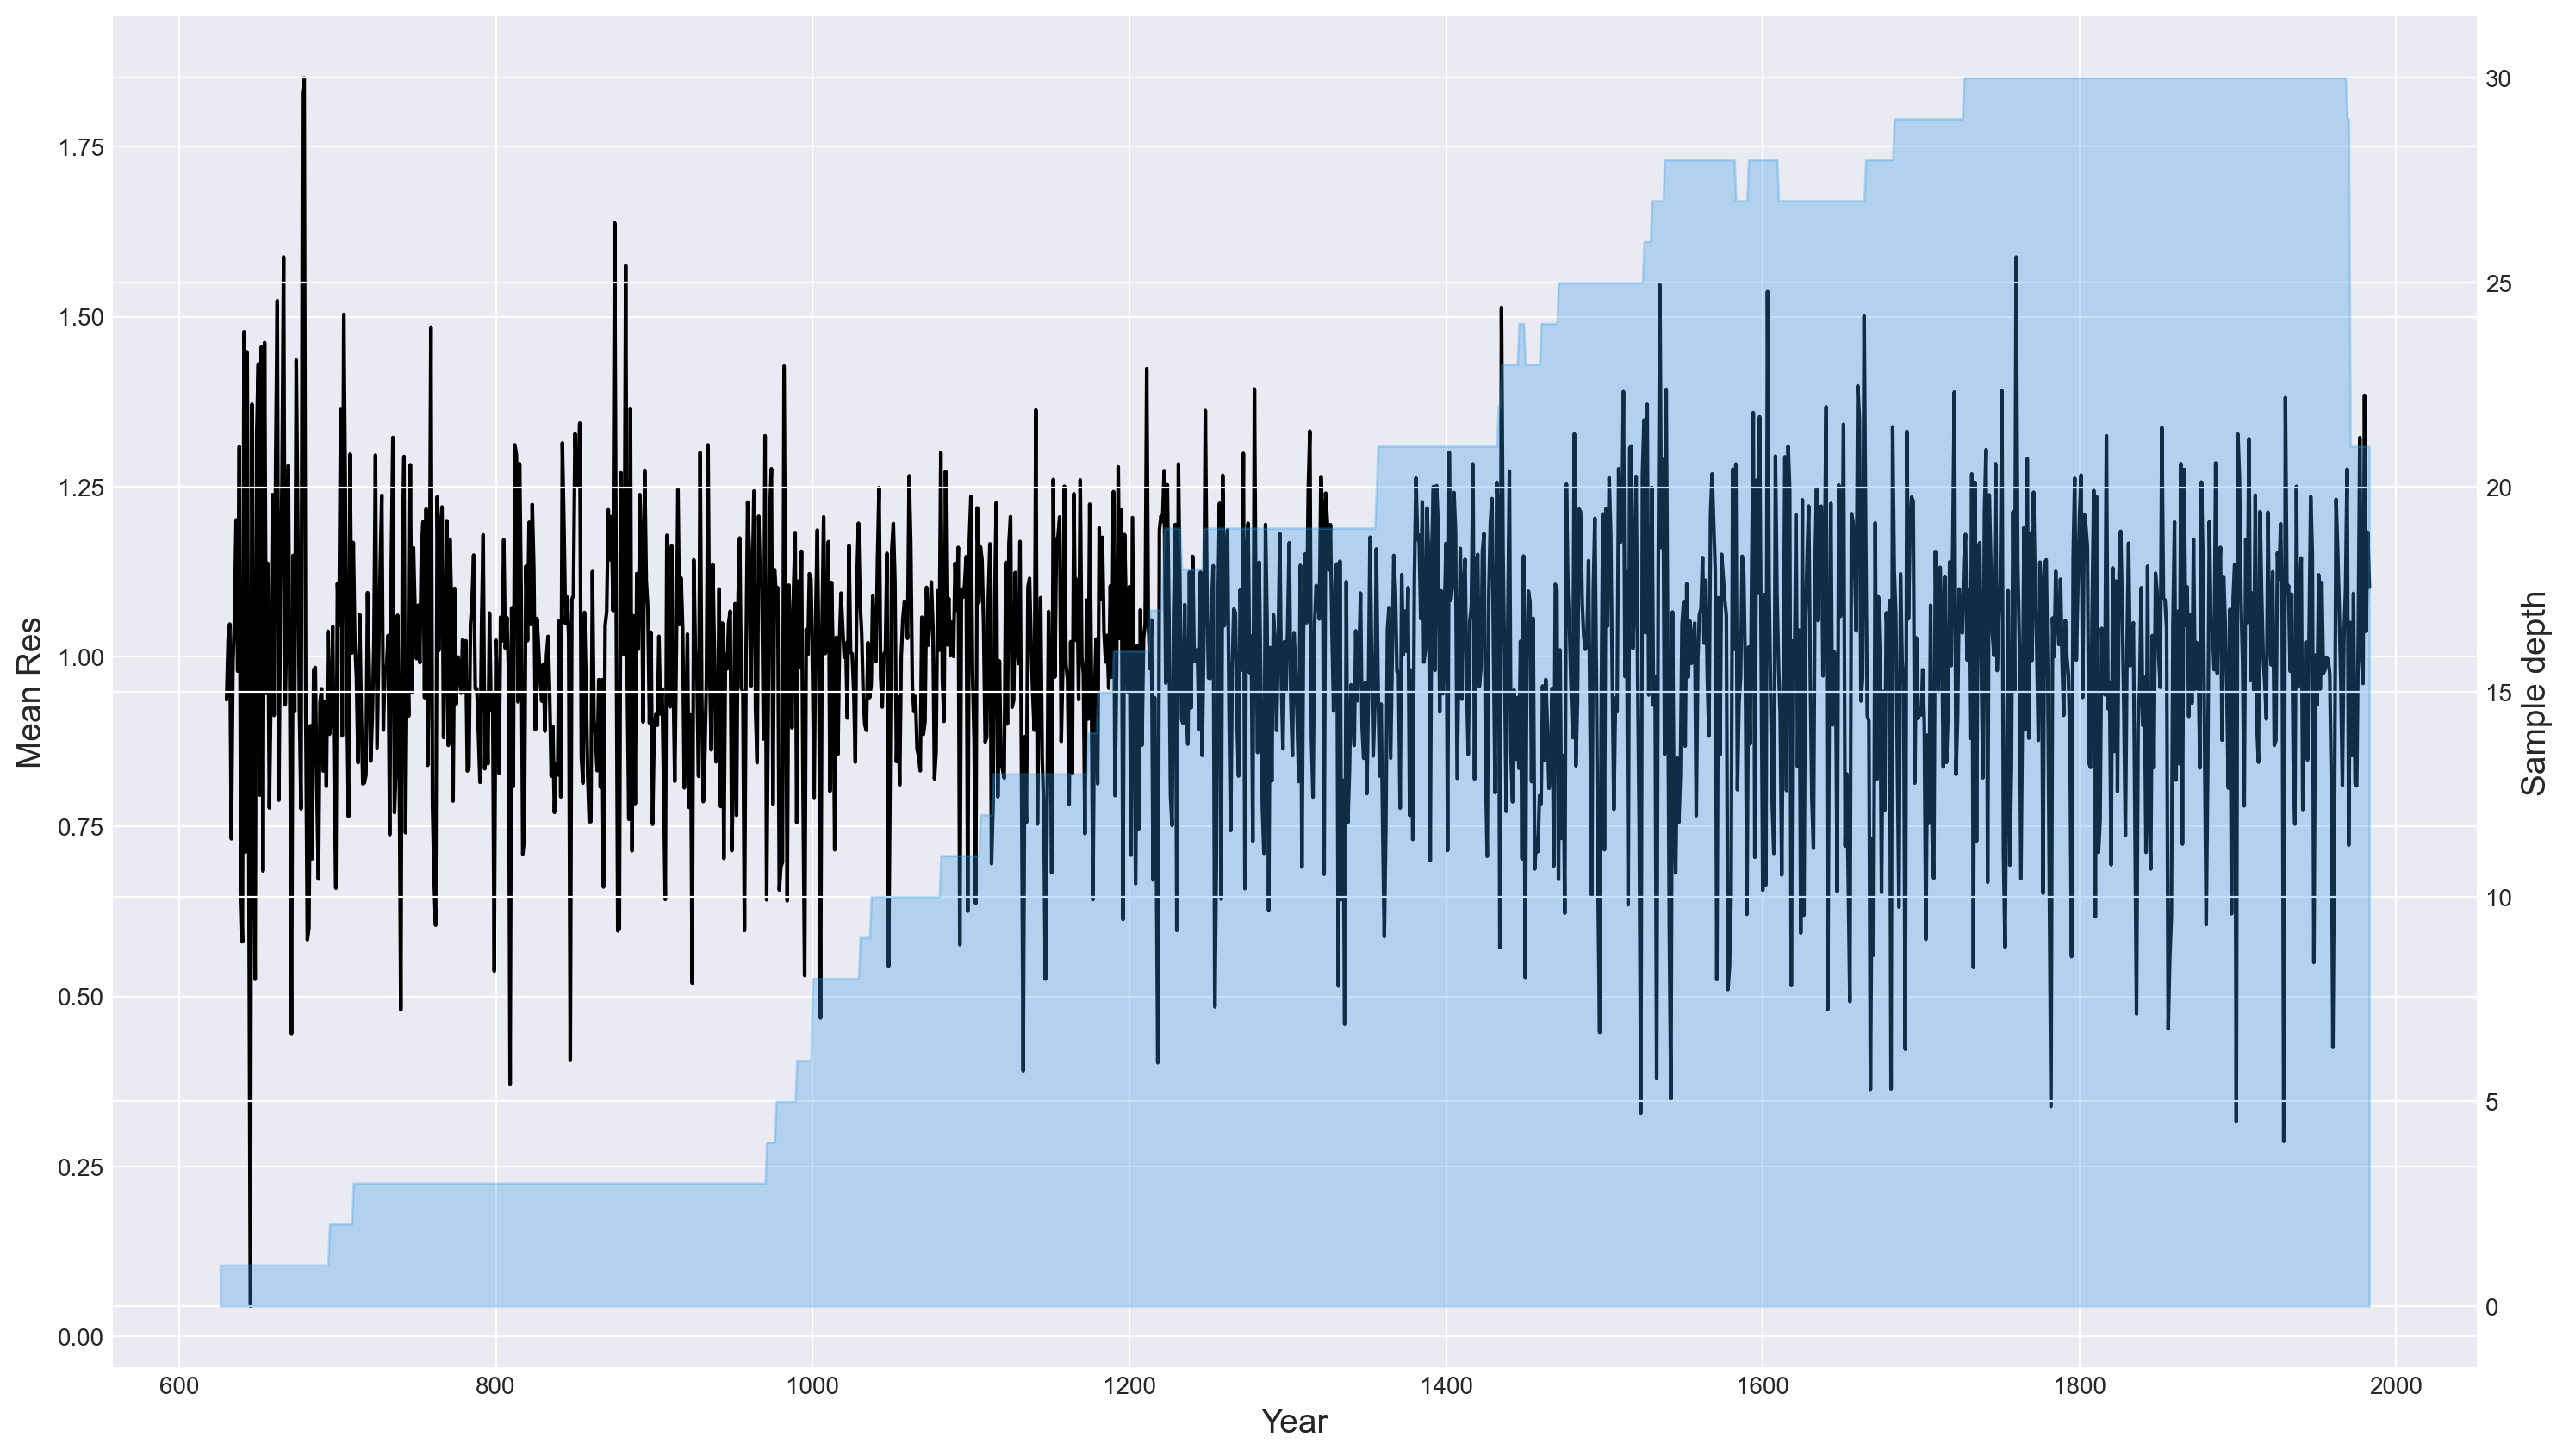

In [32]:
ca533_crn_std = dpl.chron(ca533_rwi, biweight=True, prewhiten=False, plot=True)
ca533_crn_res = dpl.chron(ca533_rwi, biweight=True, prewhiten=True, plot=True)

## Crossdating Functions

In [20]:
dpl.xdate(ca533_rwi, prewhiten=True, corr="Spearman", slide_period=50, bin_floor=10, p_val=0.05, show_flags=True)

Flags for CAM011
[A] Segment  High   -10    -9    -8    -7    -6    -5    -4    -3    -2    -1     0    +1    +2    +3    +4    +5    +6    +7    +8    +9   +10
   1905-1954   -8  0.02 -0.37  0.25 -0.15  0.07 -0.13 -0.09 -0.09 -0.05  0.15  0.18 -0.21 -0.01  0.10  0.15 -0.07  0.23  0.13 -0.22  0.15 -0.19
   1930-1979   -8 -0.01 -0.23  0.25 -0.07  0.01 -0.17  0.02 -0.00  0.07  0.05  0.17 -0.12 -0.13 -0.27  0.10                                    

Flags for CAM051
[B] Segment  High   -10    -9    -8    -7    -6    -5    -4    -3    -2    -1     0    +1    +2    +3    +4    +5    +6    +7    +8    +9   +10
   1380-1429    9 -0.06 -0.22  0.19  0.09 -0.11  0.10  0.31  0.07 -0.15 -0.07  0.14  0.04 -0.16  0.27  0.04 -0.06  0.01  0.07 -0.09  0.34 -0.15

Flags for CAM131
[A] Segment  High   -10    -9    -8    -7    -6    -5    -4    -3    -2    -1     0    +1    +2    +3    +4    +5    +6    +7    +8    +9   +10
   1805-1854    0 -0.17 -0.11 -0.05 -0.08  0.11 -0.03 -0.06 -0.02  0.01 -0.19  0.23

CAM011    CAM021    CAM031    CAM032    CAM041    CAM042  \
630-679         NaN       NaN       NaN       NaN       NaN       NaN   
655-704         NaN       NaN       NaN       NaN       NaN       NaN   
680-729         NaN       NaN       NaN       NaN       NaN       NaN   
705-754         NaN       NaN       NaN       NaN       NaN       NaN   
730-779         NaN       NaN       NaN       NaN       NaN       NaN   
755-804         NaN       NaN       NaN       NaN       NaN       NaN   
780-829         NaN       NaN       NaN       NaN       NaN       NaN   
805-854         NaN       NaN       NaN       NaN       NaN       NaN   
830-879         NaN       NaN       NaN       NaN       NaN       NaN   
855-904         NaN       NaN       NaN       NaN       NaN       NaN   
880-929         NaN       NaN       NaN       NaN       NaN       NaN   
905-954         NaN       NaN       NaN       NaN       NaN       NaN   
930-979         NaN       NaN       NaN       NaN       NaN       NaN   
955-1004        NaN       NaN       NaN       NaN       NaN       NaN   
980-1029        NaN       NaN       NaN       NaN       NaN       NaN   
1005-1054       NaN       NaN       NaN       NaN       NaN       NaN   
1030-1079       NaN       NaN       NaN       NaN       NaN       NaN   
1055-1104       NaN       NaN       NaN       NaN       NaN       NaN   
1080-1129       NaN       NaN       NaN       NaN       NaN       NaN   
1105-1154       NaN       NaN       NaN       NaN       NaN       NaN   
1130-1179       NaN       NaN       NaN       NaN       NaN       NaN   
1155-1204       NaN       NaN       NaN       NaN       NaN       NaN   
1180-1229       NaN       NaN       NaN       NaN       NaN       NaN   
1205-1254       NaN       NaN       NaN       NaN       NaN       NaN   
1230-1279       NaN       NaN       NaN       NaN       NaN       NaN   
1255-1304       NaN       NaN       NaN       NaN       NaN       NaN   
1280-1329       NaN       NaN       NaN       NaN       NaN       NaN   
1305-1354       NaN       NaN       NaN       NaN       NaN       NaN   
1330-1379       NaN       NaN       NaN       NaN       NaN       NaN   
1355-1404       NaN       NaN       NaN       NaN       NaN       NaN   
1380-1429       NaN       NaN  0.409652       NaN       NaN       NaN   
1405-1454       NaN       NaN  0.648788       NaN       NaN       NaN   
1430-1479       NaN       NaN  0.738776       NaN       NaN       NaN   
1455-1504       NaN  0.698920  0.808499  0.567539       NaN       NaN   
1480-1529       NaN  0.665210  0.749820  0.647155       NaN       NaN   
1505-1554       NaN  0.703529  0.638223  0.666651       NaN       NaN   
1530-1579       NaN  0.692293  0.538439  0.603073       NaN       NaN   
1555-1604  0.705354  0.695750  0.510012  0.599328       NaN  0.642929   
1580-1629  0.768259  0.700072  0.431933  0.670204       NaN  0.643313   
1605-1654  0.636110  0.689412  0.571188  0.632749       NaN  0.572053   
1630-1679  0.555150  0.721393  0.640816  0.664922       NaN  0.710156   
1655-1704  0.678944  0.681152  0.501176  0.745594       NaN  0.706026   
1680-1729  0.687299  0.561393  0.521537  0.702953       NaN  0.559664   
1705-1754  0.516447  0.726963  0.553325  0.592125  0.367683  0.440288   
1730-1779  0.483697  0.787467  0.500120  0.604898  0.331285  0.441729   
1755-1804  0.603169  0.743962  0.459016  0.703241  0.379784  0.400336   
1780-1829  0.474862  0.556014  0.312749  0.611717  0.504058  0.489268   
1805-1854  0.513085  0.430684  0.272989  0.473613  0.605090  0.394766   
1830-1879  0.576855  0.577335  0.563313  0.664346  0.645426  0.479184   
1855-1904  0.509244  0.711116  0.623529  0.755102  0.603361  0.682785   
1880-1929  0.308427  0.766819  0.604994  0.660024  0.454022  0.718703   
1905-1954  0.176759  0.700360  0.576951  0.634382  0.474862  0.698631   
1930-1979  0.173205  0.613061  0.531236  0.578199  0.608259  0.618727   

             CAM051    CAM061    CAM062    CAM071  ...    CAM151    CA

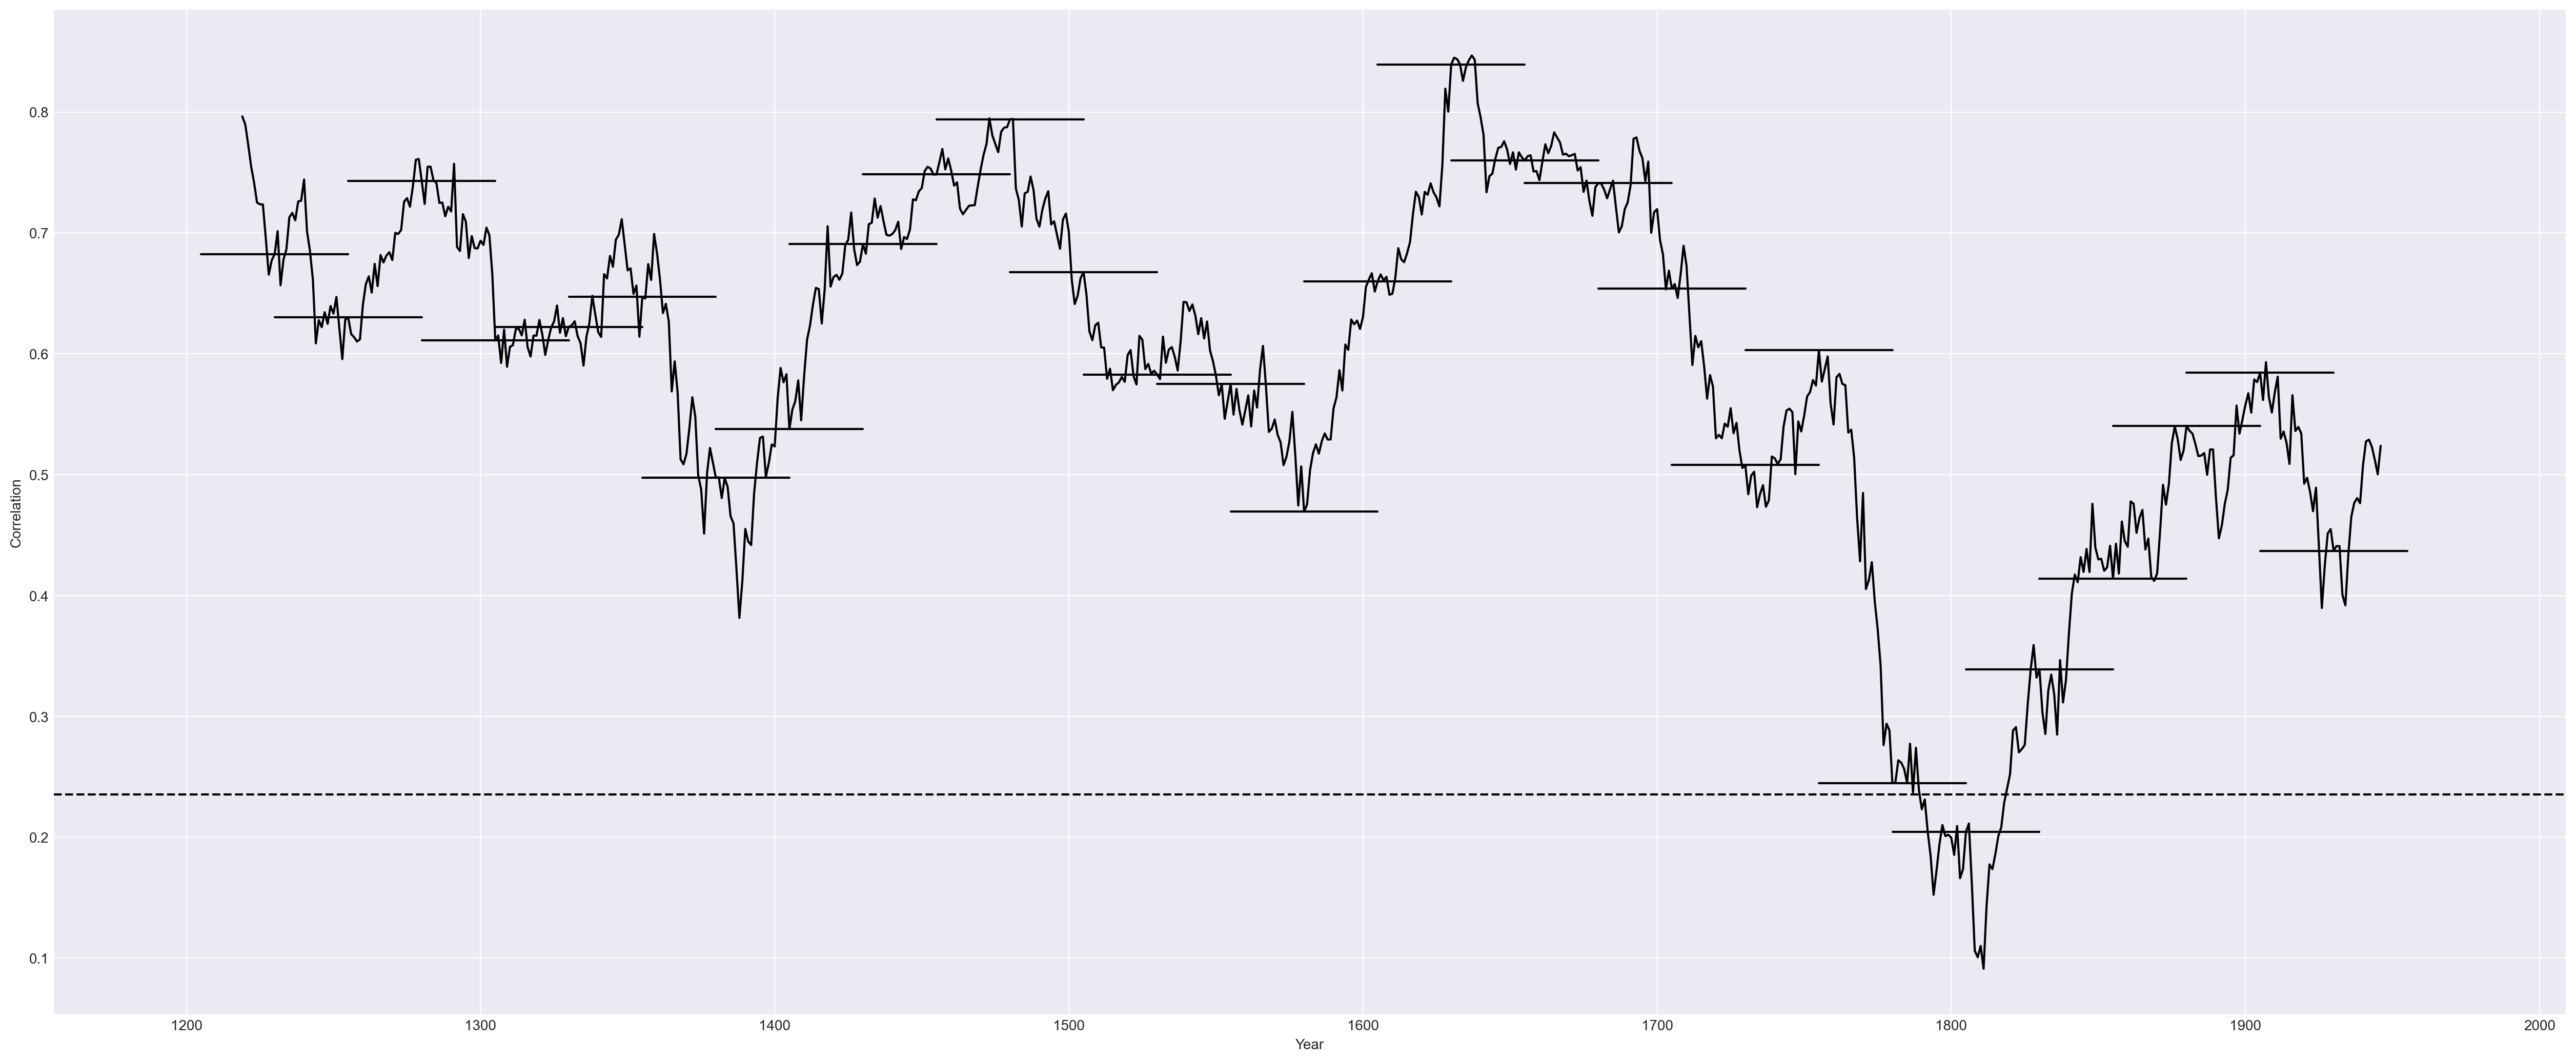

<Figure size 200x200 with 0 Axes>

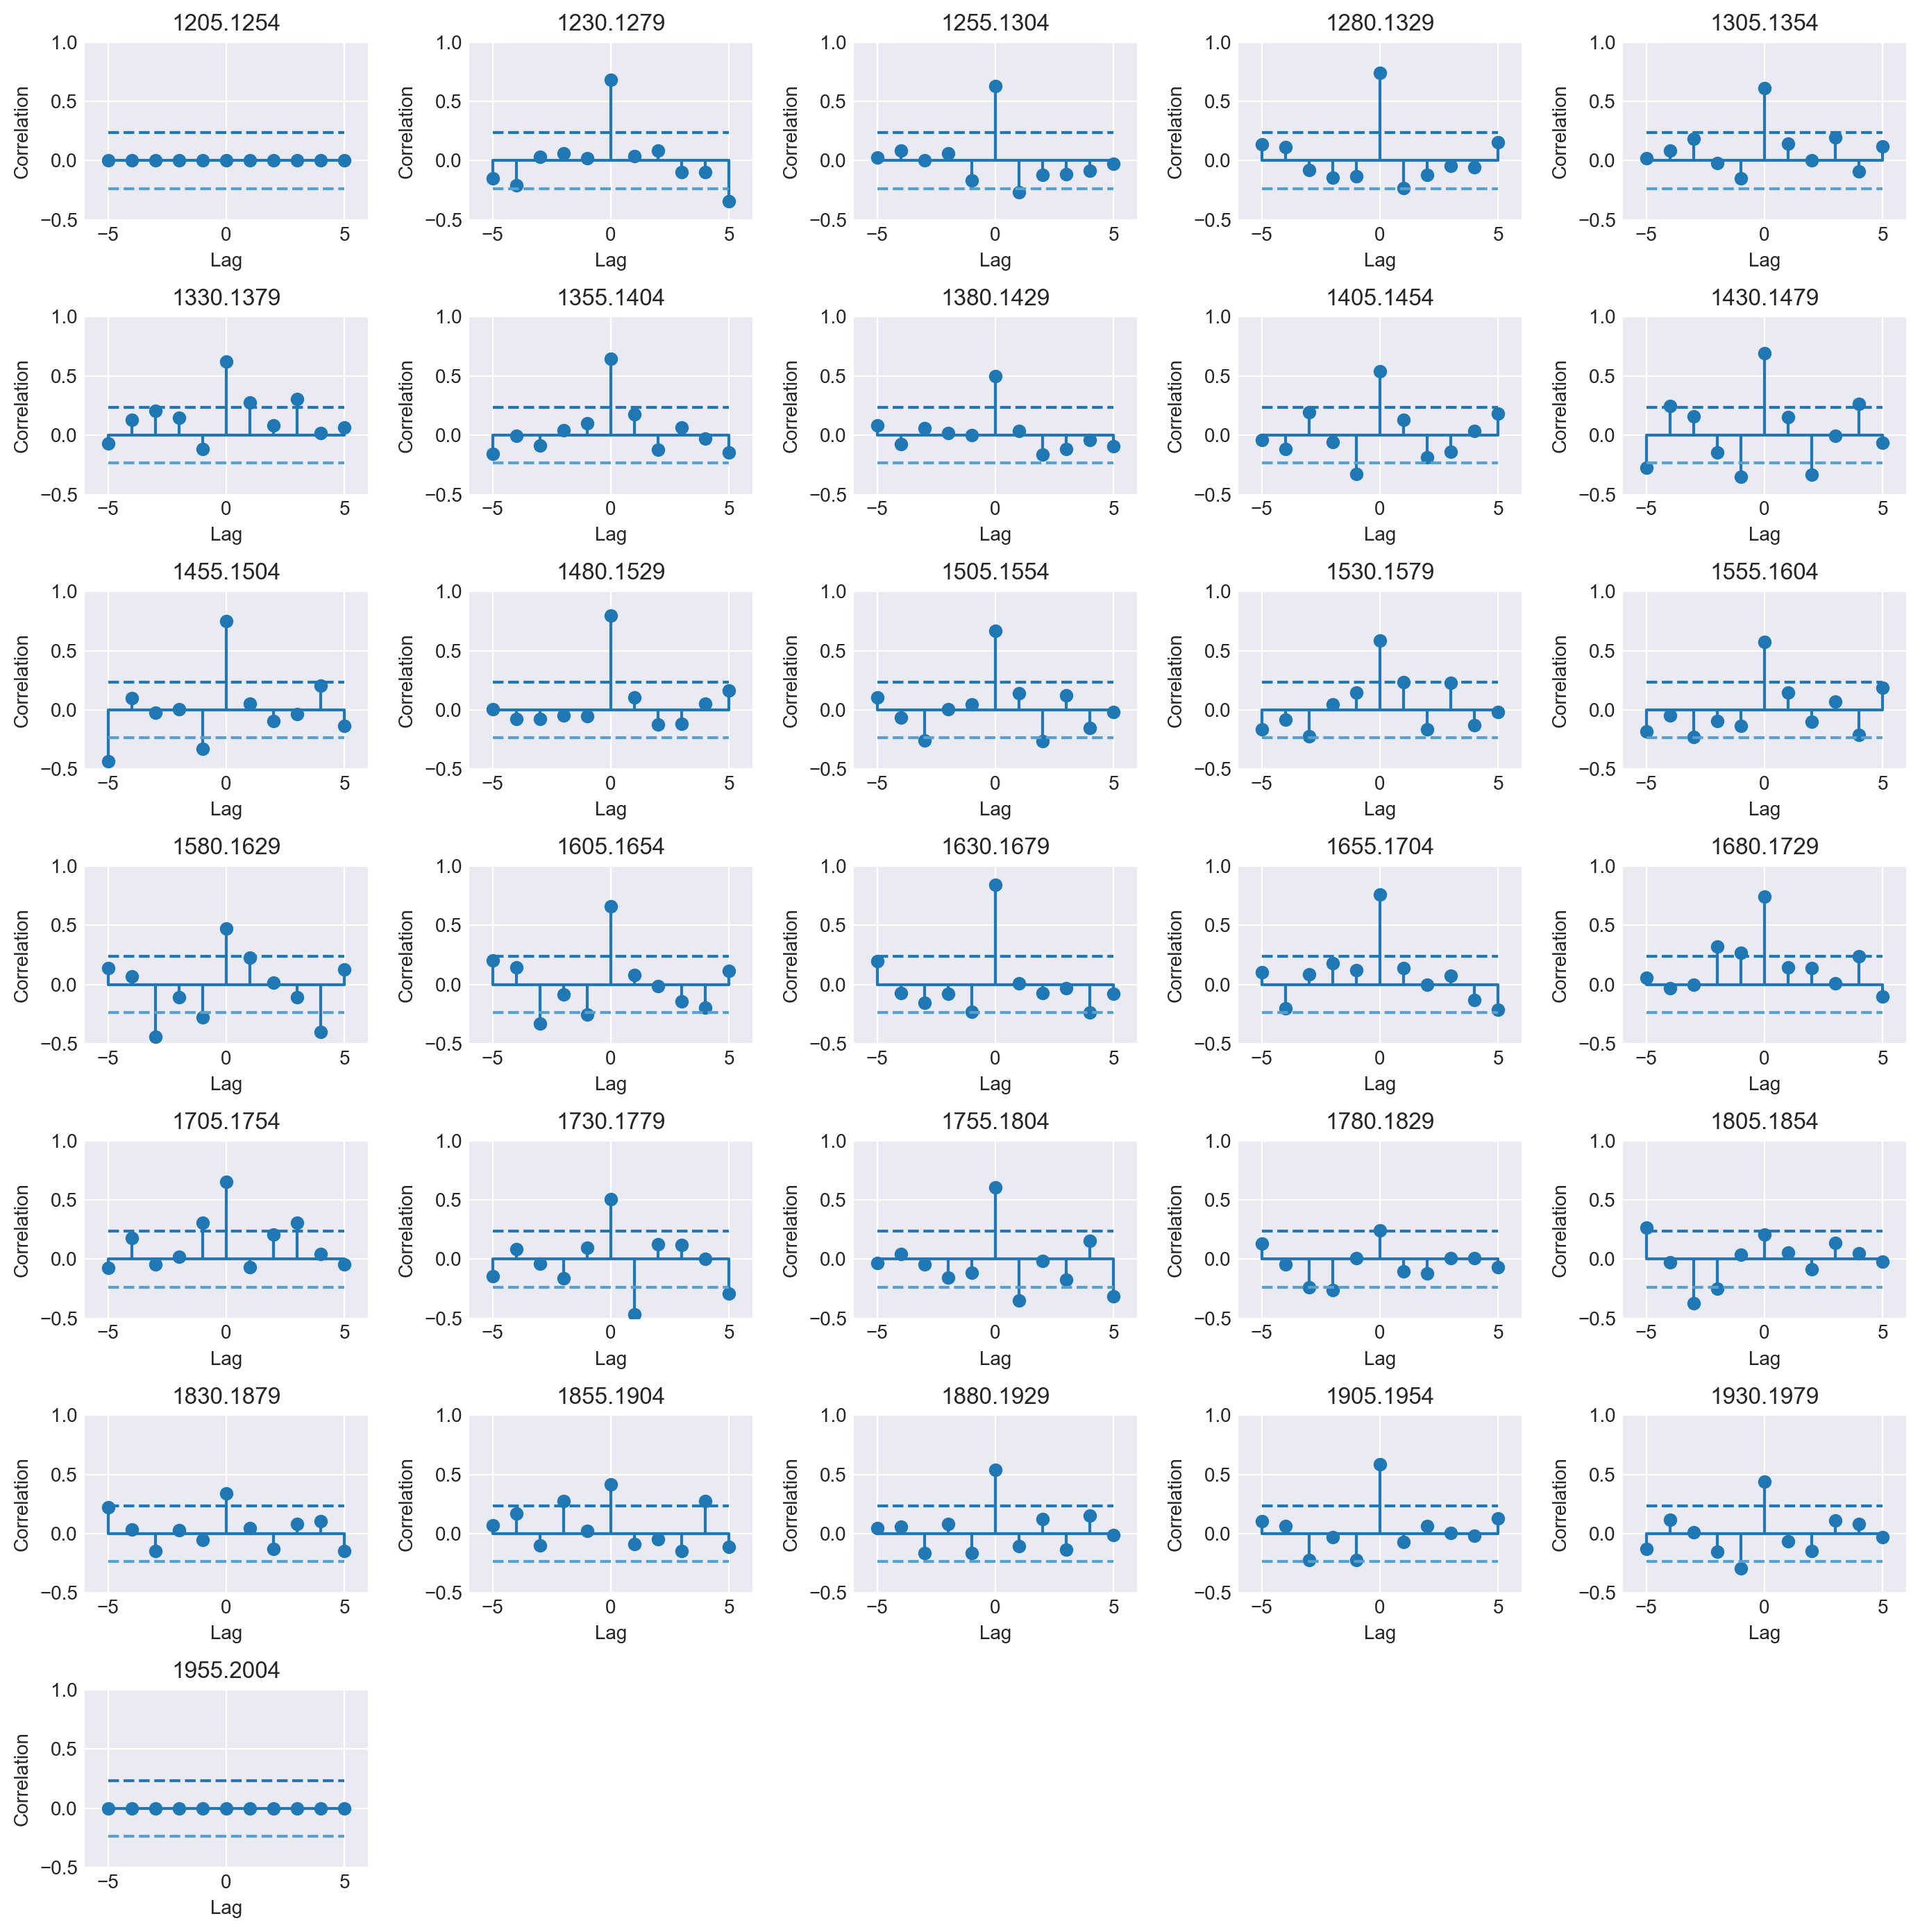

In [21]:
dpl.series_corr(ca533_rwi, "CAM181", prewhiten=True, corr="Spearman", seg_length=50, bin_floor=10, p_val=0.05)